In [1]:
from sklearn.svm import LinearSVR 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVR 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import learning_curve 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import loguniform, randint, uniform
from sklearn.pipeline import Pipeline 
from sklearn import metrics  
import math
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import time
import os  # Á°Æ‰øùÂØºÂÖ•osÊ®°Âùó

In [2]:
# Êï∞ÊçÆÂä†ËΩΩÂíåÈ¢ÑÂ§ÑÁêÜ
data = pd.read_excel('data/CO2_20250208.xlsx', sheet_name='CO2 solubility data')

In [3]:
data.head(8)

No.                  IL  x_CO2 (mol/kg sorbent)   T (K)  P (bar)  IF1  IF2  \
0    1  [Bis(mim)C2][Gly]2                  0.8504  313.15   0.1154    2    0   
1    2  [Bis(mim)C2][Gly]2                  1.1442  313.15   0.2692    2    0   
2    3  [Bis(mim)C2][Gly]2                  1.4535  313.15   0.5385    2    0   
3    4  [Bis(mim)C2][Gly]2                  2.3503  313.15   0.8462    2    0   
4    5  [Bis(mim)C2][Gly]2                  2.4895  313.15   1.3077    2    0   
5    6  [Bis(mim)C2][Gly]2                  2.5823  313.15   1.7308    2    0   
6    7  [Bis(mim)C2][Gly]2                  2.6132  313.15   2.0000    2    0   
7    8  [Bis(mim)C2][Gly]2                  2.6441  313.15   2.9615    2    0   

   IF3  IF4  IF5  ...  IF35  IF36  IF37  IF38  IF39  IF40  IF41  IF42  IF43  \
0    0    0    0  ...     0     0     0     0     0     0     0     0     0   
1    0    0    0  ...     0     0     0     0     0     0     0     0     0   
2    0    0    0  ...     0     0     0     0     0     0     0     0     0   
3    0    0    0  ...     0     0     0     0     0     0     0     0     0   
4    0    0    0  ...     0     0     0     0     0     0     0     0     0   
5    0    0    0  ...     0     0     0     0     0     0     0     0     0   
6    0    0    0  ...     0     0     0     0     0     0     0     0     0   
7    0    0    0  ...     0     0     0     0     0     0     0     0     0   

   IF44  
0     0  
1     0  
2     0  
3     0  
4     0  
5     0  
6     0  
7     0  

[8 rows x 49 columns]

In [4]:
print(data.shape)

(2500, 49)


In [5]:
exclude =['No.','IL']
y='x_CO2 (mol/kg sorbent)'
features = [var for var in data.columns if var not in exclude+[y]]
print(len(features), len(exclude))

46 2


In [6]:
data = data.fillna(0)

In [7]:
data[features].info(show_counts = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 46 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   T (K)    2500 non-null   float64
 1   P (bar)  2500 non-null   float64
 2   IF1      2500 non-null   int64  
 3   IF2      2500 non-null   int64  
 4   IF3      2500 non-null   int64  
 5   IF4      2500 non-null   int64  
 6   IF5      2500 non-null   int64  
 7   IF6      2500 non-null   int64  
 8   IF7      2500 non-null   int64  
 9   IF8      2500 non-null   int64  
 10  IF9      2500 non-null   int64  
 11  IF10     2500 non-null   int64  
 12  IF11     2500 non-null   int64  
 13  IF12     2500 non-null   int64  
 14  IF13     2500 non-null   int64  
 15  IF14     2500 non-null   int64  
 16  IF15     2500 non-null   int64  
 17  IF16     2500 non-null   int64  
 18  IF17     2500 non-null   int64  
 19  IF18     2500 non-null   int64  
 20  IF19     2500 non-null   int64  
 21  IF20     2500 

In [8]:
single_var =[]
for var in features:
    print(var, "----",len(data[var].unique()),data[var].unique()) 
    if len(data[var].unique())==1:
        single_var.append(var)

T (K) ---- 48 [313.15 293.15 303.15 323.15 298.2  298.1  298.   298.3  288.15 298.15
 308.15 318.15 303.16 313.28 313.31 323.32 323.34 333.35 333.36 333.41
 353.55 353.18 295.15 283.1  323.1  348.1  348.2  310.15 333.15 343.15
 303.2  313.2  323.2  343.2  353.2  328.15 338.15 333.2  295.12 353.15
 296.15 373.15 393.15 308.   318.   328.   338.   283.15]
P (bar) ---- 1112 [0.1154 0.2692 0.5385 ... 0.234  0.239  0.419 ]
IF1 ---- 4 [ 2  1  0 10]
IF2 ---- 2 [0 1]
IF3 ---- 3 [0 2 1]
IF4 ---- 2 [0 1]
IF5 ---- 2 [0 1]
IF6 ---- 5 [ 0  1  2  3 10]
IF7 ---- 2 [0 1]
IF8 ---- 2 [0 1]
IF9 ---- 2 [0 1]
IF10 ---- 4 [0 3 2 1]
IF11 ---- 2 [0 1]
IF12 ---- 3 [0 2 1]
IF13 ---- 3 [0 1 2]
IF14 ---- 2 [0 1]
IF15 ---- 11 [ 2  4  5  3 20  1  6  8 12  7 40]
IF16 ---- 32 [  4   2   6   3   5   7   8   1  25  11  14   0  10  31  29  30  32  20
  26  21  12  24  22  33  17  13  16  28 295  58  57  56]
IF17 ---- 3 [0 1 2]
IF18 ---- 2 [0 1]
IF19 ---- 2 [0 1]
IF20 ---- 3 [0 2 1]
IF21 ---- 2 [0 1]
IF22 ---- 14 [ 6 12 

In [9]:
single_var

[]

In [10]:
# Á°Æ‰øùÂè™‰ΩøÁî®Êï∞ÂÄºÁâπÂæÅ
use_features = [var for var in features if data[var].dtype in ['int64', 'float64']]

print(f"‰ΩøÁî®ÁöÑÁâπÂæÅÊï∞Èáè: {len(use_features)}")
print(f"ÁâπÂæÅÂàóË°®: {use_features}")

‰ΩøÁî®ÁöÑÁâπÂæÅÊï∞Èáè: 46
ÁâπÂæÅÂàóË°®: ['T (K)', 'P (bar)', 'IF1', 'IF2', 'IF3', 'IF4', 'IF5', 'IF6', 'IF7', 'IF8', 'IF9', 'IF10', 'IF11', 'IF12', 'IF13', 'IF14', 'IF15', 'IF16', 'IF17', 'IF18', 'IF19', 'IF20', 'IF21', 'IF22', 'IF23', 'IF24', 'IF25', 'IF26', 'IF27', 'IF28', 'IF29', 'IF30', 'IF31', 'IF32', 'IF33', 'IF34', 'IF35', 'IF36', 'IF37', 'IF38', 'IF39', 'IF40', 'IF41', 'IF42', 'IF43', 'IF44']


In [11]:
# ÂàÜÂâ≤Êï∞ÊçÆ
X_train, X_test, y_train, y_test = train_test_split(
    data[use_features], data[y], test_size=0.2, random_state=512
)

print(f"ËÆ≠ÁªÉÈõÜÂΩ¢Áä∂: {X_train.shape}, ÊµãËØïÈõÜÂΩ¢Áä∂: {X_test.shape}")

ËÆ≠ÁªÉÈõÜÂΩ¢Áä∂: (2000, 46), ÊµãËØïÈõÜÂΩ¢Áä∂: (500, 46)


In [12]:
X_train

T (K)  P (bar)  IF1  IF2  IF3  IF4  IF5  IF6  IF7  IF8  ...  IF35  \
268   288.15   3.5000    1    0    0    0    0    0    0    0  ...     0   
229   298.10   6.9990    1    0    0    0    0    0    0    0  ...     0   
1891  308.00   1.0000    0    0    0    0    0    1    0    0  ...     0   
1647  373.15   0.5920    0    0    0    0    0    1    0    0  ...     0   
398   308.15   0.1830    1    0    0    0    0    0    0    0  ...     0   
...      ...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
636   308.15   1.5000    0    0    0    0    1    0    0    0  ...     0   
2305  303.15   0.7870    1    0    0    0    0    0    0    0  ...     0   
1181  313.15   7.2286    1    0    1    0    0    0    0    0  ...     0   
360   298.10   0.5040    1    0    0    0    0    0    0    0  ...     0   
929   353.20   1.0260    0    0    0    0    1    0    0    0  ...     0   

      IF36  IF37  IF38  IF39  IF40  IF41  IF42  IF43  IF44  
268      0     0     0     0     0     0     0     0     0  
229      0     0     0     0     0     0     0     0     0  
1891     0     0     0     0     0     0     0     0     0  
1647     0     0     0     0     0     0     0     0     0  
398      0     0     0     0     0     0     0     0     0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
636      0     0     0     0     0     0     0     0     0  
2305     0     0     0     0     0     0     0     0     0  
1181     0     0     0     0     0     0     0     0     0  
360      0     0     0     0     0     0     0     0     0  
929      0     0     0     0     0     0     0     0     0  

[2000 rows x 46 columns]

In [13]:
single_var

[]

In [14]:
# Ê£ÄÊü•Êï∞ÊçÆ‰∏≠ÊòØÂê¶ËøòÊúâÈùûÊï∞ÂÄºÂÄº
print("\nÊ£ÄÊü•Êï∞ÊçÆÁ±ªÂûã:")
print(X_train.dtypes)



Ê£ÄÊü•Êï∞ÊçÆÁ±ªÂûã:
T (K)      float64
P (bar)    float64
IF1          int64
IF2          int64
IF3          int64
IF4          int64
IF5          int64
IF6          int64
IF7          int64
IF8          int64
IF9          int64
IF10         int64
IF11         int64
IF12         int64
IF13         int64
IF14         int64
IF15         int64
IF16         int64
IF17         int64
IF18         int64
IF19         int64
IF20         int64
IF21         int64
IF22         int64
IF23         int64
IF24         int64
IF25         int64
IF26         int64
IF27         int64
IF28         int64
IF29         int64
IF30         int64
IF31         int64
IF32         int64
IF33         int64
IF34         int64
IF35         int64
IF36         int64
IF37         int64
IF38         int64
IF39         int64
IF40         int64
IF41         int64
IF42         int64
IF43         int64
IF44         int64
dtype: object


In [15]:
# ËÆæÁΩÆÂÖ®Â±ÄÊ†∑Âºè
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.sans-serif'] = ['Arial']

In [16]:
# 1. ÂêåÊó∂ËØÑ‰º∞ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ
def evaluate_model_full(model, X_train, y_train, X_test, y_test):
    """
    ËØÑ‰º∞Ê®°ÂûãÂú®ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ‰∏äÁöÑÂêÑÁßçÊåáÊ†á
    """
    # ËÆ≠ÁªÉÈõÜÈ¢ÑÊµãÂíåËØÑ‰º∞
    y_train_pred = model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_aard = 100 * np.mean(np.abs((y_train - y_train_pred) / np.clip(np.abs(y_train), 1e-10, None)))
    
    # ÊµãËØïÈõÜÈ¢ÑÊµãÂíåËØÑ‰º∞
    y_test_pred = model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_aard = 100 * np.mean(np.abs((y_test - y_test_pred) / np.clip(np.abs(y_test), 1e-10, None)))
    
    return {
        'train': {
            'R2': train_r2, 
            'MAE': train_mae, 
            'MSE': train_mse, 
            'RMSE': train_rmse, 
            'AARD%': train_aard
        },
        'test': {
            'R2': test_r2, 
            'MAE': test_mae, 
            'MSE': test_mse, 
            'RMSE': test_rmse, 
            'AARD%': test_aard
        },
        'predictions': {
            'y_train_pred': y_train_pred,
            'y_test_pred': y_test_pred
        }
    }


In [17]:
# 2. ÂÆö‰πâ‰∏çÂêåÊ†∏ÂáΩÊï∞ÁöÑÂèÇÊï∞
param_distributions = {
    'linear': {
        'svr__C': loguniform(1e-3, 1e3),
        'svr__epsilon': loguniform(1e-3, 0.1)
    },
    'rbf': {
        'svr__C': loguniform(1e-3, 1e3),
        'svr__gamma': loguniform(1e-5, 1e2),
        'svr__epsilon': loguniform(1e-3, 0.1)
    },
    'poly': {
        'svr__C': loguniform(1e-3, 1e3),
        'svr__epsilon': loguniform(1e-3, 0.1),
        'svr__degree': randint(2, 5),  # 2Âà∞4ÁöÑÊï¥Êï∞
        'svr__coef0': uniform(0, 1)
    },
    'sigmoid': {
        'svr__C': loguniform(1e-3, 1e3),
        'svr__gamma': loguniform(1e-5, 1e2),
        'svr__coef0': uniform(0, 1),
        'svr__epsilon': loguniform(1e-3, 0.1)
    }
}

# ÂàùÂßãÂåñÁªìÊûúÂ≠òÂÇ®
results = {}
best_models = {}

In [18]:
# 3. ÂØπÊØèÁßçÊ†∏ÂáΩÊï∞ËøõË°åÈöèÊú∫ÊêúÁ¥¢
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

for kernel in kernels:
    print(f"\nÊ≠£Âú®ËÆ≠ÁªÉ {kernel} Ê†∏ÂáΩÊï∞...")
    start_time = time.time()
    
    # ÂàõÂª∫pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR(kernel=kernel))
    ])
    
    # ÈöèÊú∫ÊêúÁ¥¢
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_distributions[kernel],
        n_iter=100,
        scoring='neg_mean_squared_error',
        cv=5,
        verbose=2,
        n_jobs=-1,
        random_state=512,
        pre_dispatch='2*n_jobs'
    )
    
    try:
        # Âú®ËÆ≠ÁªÉÈõÜ‰∏äÊãüÂêàÈöèÊú∫ÊêúÁ¥¢
        random_search.fit(X_train, y_train)
        
        # Â≠òÂÇ®ÊúÄ‰Ω≥Ê®°ÂûãÂíåÂÖ∂‰∫§ÂèâÈ™åËØÅÂàÜÊï∞
        best_model = random_search.best_estimator_
        best_cv_score = -random_search.best_score_
        best_params = random_search.best_params_
        
        print(f"Best CV MSE for {kernel}: {best_cv_score:.4f}")
        print(f"Best Parameters: {best_params}")
        
        # Áî®ÊúÄ‰Ω≥Ê®°ÂûãÂú®ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ‰∏äËøõË°åËØÑ‰º∞
        full_metrics = evaluate_model_full(best_model, X_train, y_train, X_test, y_test)
        
        # Â≠òÂÇ®ÊâÄÊúâÁªìÊûú
        results[kernel] = {
            'best_model': best_model,
            'best_cv_score': best_cv_score,
            'best_params': best_params,
            'train_metrics': full_metrics['train'],
            'test_metrics': full_metrics['test']
        }
        
        end_time = time.time()
        print(f"{kernel} Ê†∏ÂáΩÊï∞ËÆ≠ÁªÉÂÆåÊàêÔºåËÄóÊó∂: {end_time - start_time:.2f} Áßí")
        
    except Exception as e:
        print(f"ËÆ≠ÁªÉ {kernel} Ê†∏ÂáΩÊï∞Êó∂Âá∫Èîô: {e}")
        import traceback
        traceback.print_exc()
        continue


Ê≠£Âú®ËÆ≠ÁªÉ linear Ê†∏ÂáΩÊï∞...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best CV MSE for linear: 0.9437
Best Parameters: {'svr__C': 0.10257451272312866, 'svr__epsilon': 0.015982104772500425}
linear Ê†∏ÂáΩÊï∞ËÆ≠ÁªÉÂÆåÊàêÔºåËÄóÊó∂: 2088.72 Áßí

Ê≠£Âú®ËÆ≠ÁªÉ rbf Ê†∏ÂáΩÊï∞...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best CV MSE for rbf: 0.2264
Best Parameters: {'svr__C': 34.879281104286264, 'svr__epsilon': 0.006901630770467411, 'svr__gamma': 0.21197417334052496}
rbf Ê†∏ÂáΩÊï∞ËÆ≠ÁªÉÂÆåÊàêÔºåËÄóÊó∂: 57.13 Áßí

Ê≠£Âú®ËÆ≠ÁªÉ poly Ê†∏ÂáΩÊï∞...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best CV MSE for poly: 0.4732
Best Parameters: {'svr__C': 604.5915517293635, 'svr__coef0': 0.7495513992401993, 'svr__degree': 3, 'svr__epsilon': 0.008276508883382664}
poly Ê†∏ÂáΩÊï∞ËÆ≠ÁªÉÂÆåÊàêÔºåËÄóÊó∂: 162.55 Áßí

Ê≠£Âú®ËÆ≠ÁªÉ sigmoid Ê†∏ÂáΩÊï∞...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best CV MSE for sigmoid: 0.9747
Best P

In [20]:
# 4. Ê±áÊÄªÂπ∂ÊØîËæÉÊâÄÊúâÊ®°ÂûãÂú®ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ‰∏äÁöÑÊÄßËÉΩ
if results:
    print("\n" + "="*80)
    print("FINAL COMPARISON - TRAINING SET PERFORMANCE")
    print("="*80)
    
    # ËÆ≠ÁªÉÈõÜÊÄßËÉΩÊØîËæÉ
    train_comparison_df = pd.DataFrame()
    for kernel_name, res in results.items():
        train_metrics = res['train_metrics']
        train_comparison_df[kernel_name] = pd.Series(train_metrics)
    
    train_comparison_df = train_comparison_df.T
    print("ËÆ≠ÁªÉÈõÜÊÄßËÉΩ:")
    print(train_comparison_df.round(4))
    
    print("\n" + "="*80)
    print("FINAL COMPARISON - TEST SET PERFORMANCE")
    print("="*80)
    
    # ÊµãËØïÈõÜÊÄßËÉΩÊØîËæÉ
    test_comparison_df = pd.DataFrame()
    for kernel_name, res in results.items():
        test_metrics = res['test_metrics']
        test_comparison_df[kernel_name] = pd.Series(test_metrics)
    
    test_comparison_df = test_comparison_df.T
    print("ÊµãËØïÈõÜÊÄßËÉΩ:")
    print(test_comparison_df.round(4))


FINAL COMPARISON - TRAINING SET PERFORMANCE
ËÆ≠ÁªÉÈõÜÊÄßËÉΩ:
             R2     MAE     MSE    RMSE     AARD%
linear   0.3888  0.5667  0.8945  0.9458  104.7328
rbf      0.9383  0.1268  0.0904  0.3006   27.7841
poly     0.8726  0.1956  0.1865  0.4318   29.7616
sigmoid  0.3661  0.5818  0.9277  0.9632  126.8622

FINAL COMPARISON - TEST SET PERFORMANCE
ÊµãËØïÈõÜÊÄßËÉΩ:
             R2     MAE     MSE    RMSE     AARD%
linear   0.2601  0.6169  1.0204  1.0101  100.4916
rbf      0.8440  0.2138  0.2152  0.4639   32.3137
poly     0.7761  0.2861  0.3088  0.5557   40.4569
sigmoid  0.2766  0.6190  0.9977  0.9989  107.8958


In [21]:
    # 5. ËæìÂá∫ÂêÑ‰∏™kernelÁöÑÊúÄ‰Ω≥ÂèÇÊï∞
    print("\n" + "="*80)
    print("BEST PARAMETERS FOR EACH KERNEL")
    print("="*80)
    
    for kernel_name, res in results.items():
        print(f"\n{kernel_name.upper()} Kernel Best Parameters:")
        for param_name, param_value in res['best_params'].items():
            clean_param_name = param_name.replace('svr__', '')
            print(f"  {clean_param_name}: {param_value}")


BEST PARAMETERS FOR EACH KERNEL

LINEAR Kernel Best Parameters:
  C: 0.10257451272312866
  epsilon: 0.015982104772500425

RBF Kernel Best Parameters:
  C: 34.879281104286264
  epsilon: 0.006901630770467411
  gamma: 0.21197417334052496

POLY Kernel Best Parameters:
  C: 604.5915517293635
  coef0: 0.7495513992401993
  degree: 3
  epsilon: 0.008276508883382664

SIGMOID Kernel Best Parameters:
  C: 265.923975925871
  coef0: 0.04844189034552504
  epsilon: 0.0012501565002126212
  gamma: 4.622351923490326e-05


In [22]:
    # 6. Ê†πÊçÆÊµãËØïÈõÜÊÄßËÉΩÈÄâÊã©ÊúÄ‰Ω≥Ê®°Âûã
    print("\n" + "="*80)
    print("BEST MODEL SELECTION (BASED ON TEST SET)")
    print("="*80)
    
    if 'R2' in test_comparison_df.columns:
        best_kernel_by_r2 = test_comparison_df['R2'].idxmax()
        print(f"Best kernel based on R¬≤: {best_kernel_by_r2}")
        print(f"Test R¬≤: {test_comparison_df.loc[best_kernel_by_r2, 'R2']:.4f}")
        print(f"Train R¬≤: {train_comparison_df.loc[best_kernel_by_r2, 'R2']:.4f}")
    
    if 'AARD%' in test_comparison_df.columns:
        best_kernel_by_aard = test_comparison_df['AARD%'].idxmin()
        print(f"\nBest kernel based on AARD%: {best_kernel_by_aard}")
        print(f"Test AARD%: {test_comparison_df.loc[best_kernel_by_aard, 'AARD%']:.2f}%")
        print(f"Train AARD%: {train_comparison_df.loc[best_kernel_by_aard, 'AARD%']:.2f}%")


BEST MODEL SELECTION (BASED ON TEST SET)
Best kernel based on R¬≤: rbf
Test R¬≤: 0.8440
Train R¬≤: 0.9383

Best kernel based on AARD%: rbf
Test AARD%: 32.31%
Train AARD%: 27.78%


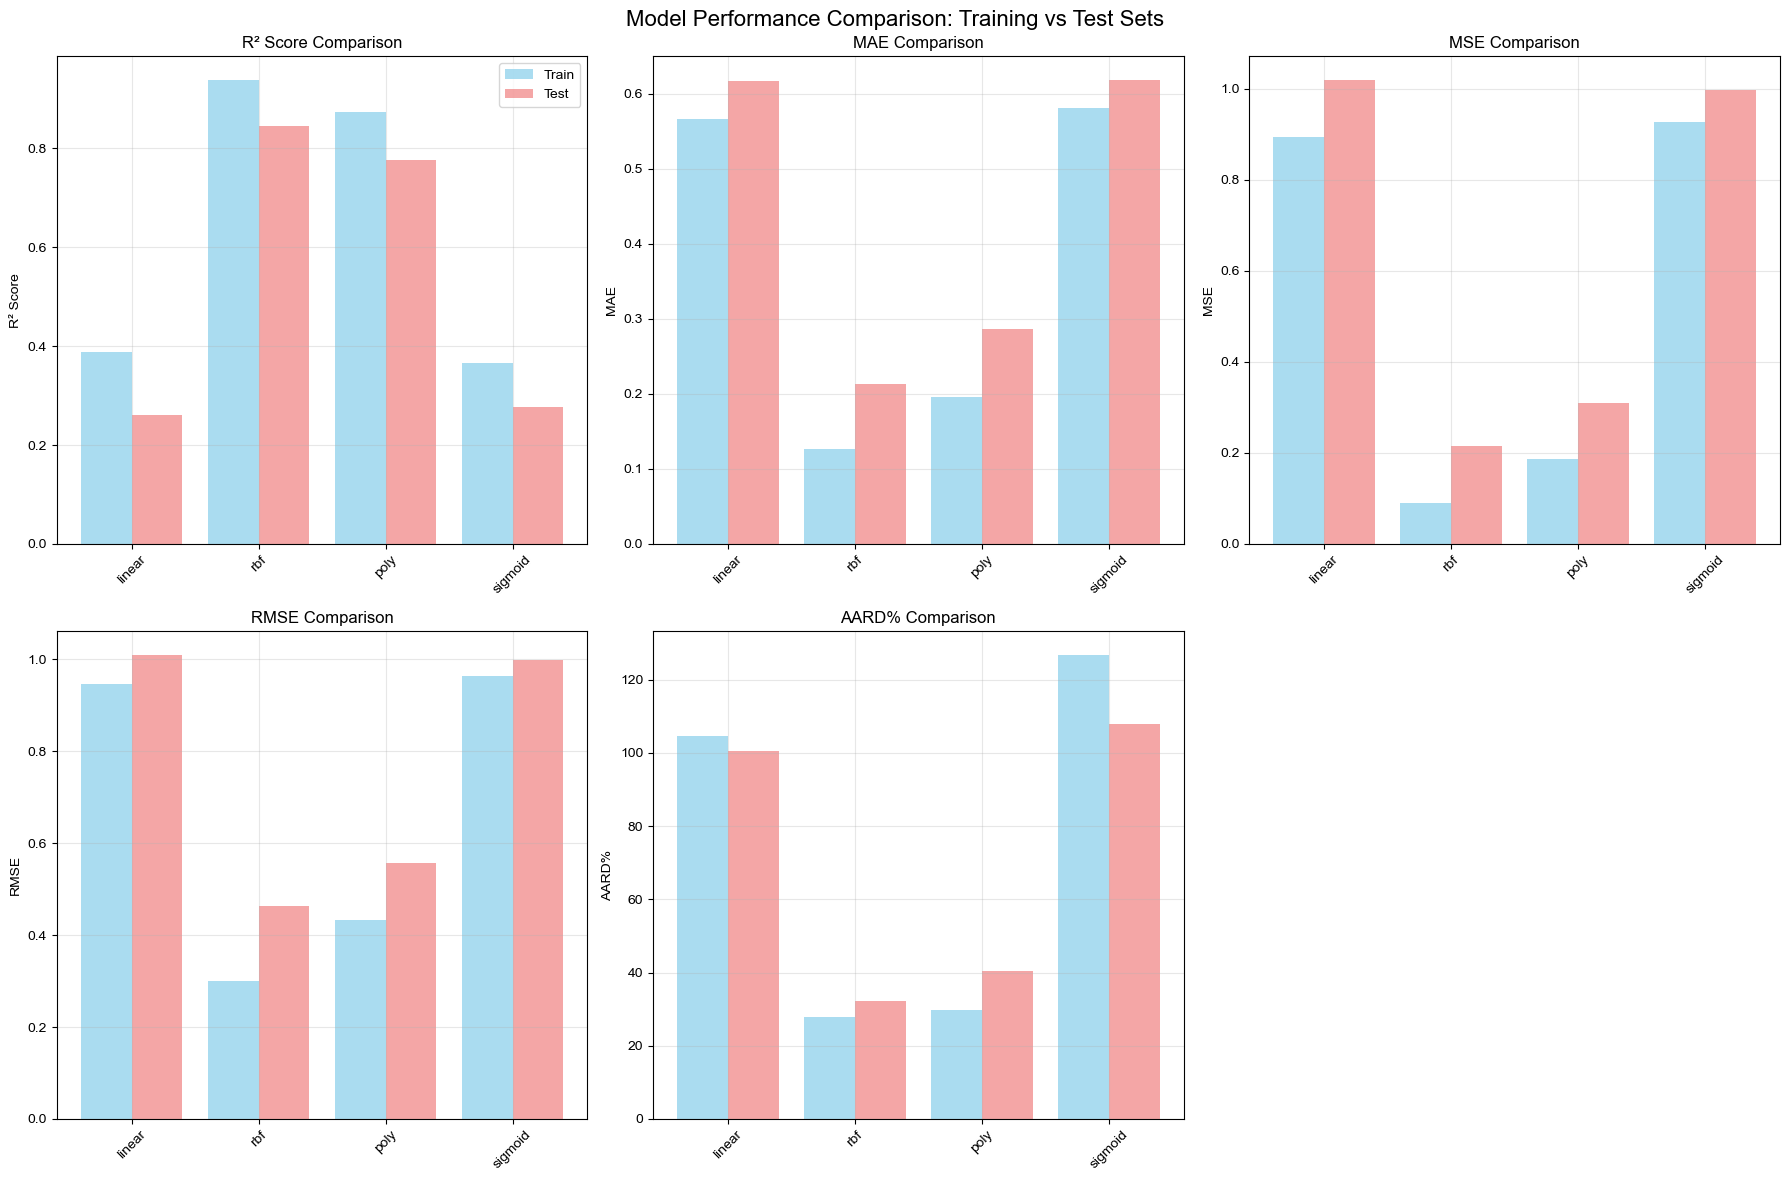

Ê®°ÂûãÊÄßËÉΩÊØîËæÉÂèØËßÜÂåñÂÆåÊàêÔºÅ


In [23]:
# 7. ÂèØËßÜÂåñÊØîËæÉÁªìÊûú
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Model Performance Comparison: Training vs Test Sets', fontsize=16)

model_names = list(results.keys())
metrics_info = [
    ('R2', 'R¬≤ Score', 'R¬≤ Score Comparison'),
    ('MAE', 'MAE', 'MAE Comparison'),
    ('MSE', 'MSE', 'MSE Comparison'),
    ('RMSE', 'RMSE', 'RMSE Comparison'),
    ('AARD%', 'AARD%', 'AARD% Comparison')
]

for i, (metric, ylabel, title) in enumerate(metrics_info):
    row = i // 3
    col = i % 3
    
    # ÊâÄÊúâÂ≠êÂõæ‰ΩøÁî®Áõ∏ÂêåÁöÑÈ¢úËâ≤
    axes[row, col].bar([x - 0.2 for x in range(len(results))], train_comparison_df[metric], 
                      width=0.4, alpha=0.7, label='Train' if i == 0 else "", color='skyblue')
    axes[row, col].bar([x + 0.2 for x in range(len(results))], test_comparison_df[metric], 
                      width=0.4, alpha=0.7, label='Test' if i == 0 else "", color='lightcoral')
    
    axes[row, col].set_title(title)
    axes[row, col].set_ylabel(ylabel)
    axes[row, col].set_xticks(range(len(results)))
    axes[row, col].set_xticklabels(model_names, rotation=45)
    axes[row, col].grid(True, alpha=0.3)
    
    # Âè™Âú®Á¨¨‰∏Ä‰∏™Â≠êÂõæÊòæÁ§∫Âõæ‰æã
    if i == 0:
        axes[row, col].legend()

# ÈöêËóèÁ¨¨ÂÖ≠‰∏™Â≠êÂõæ
axes[1, 2].set_visible(False)

plt.tight_layout()
plt.savefig('model_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Ê®°ÂûãÊÄßËÉΩÊØîËæÉÂèØËßÜÂåñÂÆåÊàêÔºÅ")

In [24]:
# È¶ñÂÖàÈúÄË¶ÅËøêË°åÊ®°Âûã‰ºòÂåñÈÉ®ÂàÜÁöÑ‰ª£Á†Å
optimized_models = {}
best_params = {}


In [25]:
    # Â≠òÂÇ®‰ºòÂåñÂêéÁöÑÊ®°Âûã
    optimized_models[kernel] = random_search.best_estimator_
    best_params[kernel] = random_search.best_params_
    
    print(f"ÊúÄ‰Ω≥ÂèÇÊï∞: {random_search.best_params_}")
    print(f"ÊúÄ‰Ω≥‰∫§ÂèâÈ™åËØÅ R¬≤: {random_search.best_score_:.4f}")
    print(f"ËÆ≠ÁªÉÊó∂Èó¥: {end_time - start_time:.2f} Áßí")
    
    # Âú®ÊµãËØïÈõÜ‰∏äËØÑ‰º∞
    test_score = random_search.score(X_test, y_test)
    print(f"ÊµãËØïÈõÜ R¬≤: {test_score:.4f}")

ÊúÄ‰Ω≥ÂèÇÊï∞: {'svr__C': 265.923975925871, 'svr__coef0': 0.04844189034552504, 'svr__epsilon': 0.0012501565002126212, 'svr__gamma': 4.622351923490326e-05}
ÊúÄ‰Ω≥‰∫§ÂèâÈ™åËØÅ R¬≤: -0.9747
ËÆ≠ÁªÉÊó∂Èó¥: 16.41 Áßí
ÊµãËØïÈõÜ R¬≤: -0.9977


In [32]:
# 8. ÂÆö‰πâÂèØËßÜÂåñËØÑ‰º∞ÂáΩÊï∞

# È¶ñÂÖàÂÆö‰πâ calculate_metrics ÂáΩÊï∞
def calculate_metrics(y_true, y_pred):
    """
    ËÆ°ÁÆóÂõûÂΩíÊ®°ÂûãÁöÑËØÑ‰º∞ÊåáÊ†á
    """
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
    import numpy as np
    
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    aard = 100 * np.mean(np.abs((y_true - y_pred) / np.clip(np.abs(y_true), 1e-10, None)))
    
    return r2, mae, mse, rmse, aard

# ÁÑ∂ÂêéÂÆö‰πâ calculate_90_percent_range ÂáΩÊï∞
def calculate_90_percent_range(errors):
    """ËÆ°ÁÆó90%Êï∞ÊçÆÁÇπËêΩÂÖ•ÁöÑÊÆãÂ∑ÆËåÉÂõ¥"""
    lower_bound = np.percentile(errors, 5)
    upper_bound = np.percentile(errors, 95)
    in_range = np.sum((errors >= lower_bound) & (errors <= upper_bound))
    total = len(errors)
    percentage = (in_range / total) * 100
    return lower_bound, upper_bound, percentage
def plot_model_evaluation(kernel_name, model, X_train, y_train, X_test, y_test, best_params):
    """‰∏∫ÊØè‰∏™Ê†∏ÂáΩÊï∞Ê®°ÂûãÁîüÊàêÂõõÁßçÂèØËßÜÂåñÂõæË°®"""
    
    # Ëé∑ÂèñÈ¢ÑÊµãÂÄº
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # ËÆ°ÁÆóËØØÂ∑Æ
    train_errors = y_train - y_train_pred
    test_errors = y_test - y_test_pred
    
    # ËÆ°ÁÆóËØÑ‰º∞ÊåáÊ†á
    train_r2, train_mae, train_mse, train_rmse, train_aard = calculate_metrics(y_train, y_train_pred)
    test_r2, test_mae, test_mse, test_rmse, test_aard = calculate_metrics(y_test, y_test_pred)
    
    # ËÆ°ÁÆó90%ËåÉÂõ¥
    train_lower, train_upper, train_percentage = calculate_90_percent_range(train_errors)
    test_lower, test_upper, test_percentage = calculate_90_percent_range(test_errors)
    
    # ËÆ°ÁÆóËØØÂ∑ÆÂú®[-0.25, 0.25]ËåÉÂõ¥ÂÜÖÁöÑÁôæÂàÜÊØî
    def calculate_error_in_range(errors, lower_bound, upper_bound):
        in_range = np.sum((errors >= lower_bound) & (errors <= upper_bound))
        percentage = (in_range / len(errors)) * 100
        return in_range, percentage
    
    train_in_025, train_percent_025 = calculate_error_in_range(train_errors, -0.25, 0.25)
    test_in_025, test_percent_025 = calculate_error_in_range(test_errors, -0.25, 0.25)
    
    # ËÆæÁΩÆÂÖ®Â±ÄÊ†∑ÂºèÂèÇÊï∞
    border_width = 2.0  # Â§ñÊ°ÜÁ≤óÁªÜ
    tick_fontsize = 14  # ÂùêÊ†áËΩ¥Ê†áÂ∞∫Â≠óÂè∑
    label_fontsize = 16  # ÂùêÊ†áËΩ¥Ê†áÁ≠æÂ≠óÂè∑
    title_fontsize = 18  # Ê†áÈ¢òÂ≠óÂè∑
    tick_width = 2.0    # ÂàªÂ∫¶Á∫øÁ≤óÁªÜ
    tick_length = 6     # ÂàªÂ∫¶Á∫øÈïøÂ∫¶
    
    # 1. È¢ÑÊµãÂÄº‰∏éÁúüÂÆûÂÄºÂØπÊØîÂõæ
    plt.figure(figsize=(6, 6))
    ax = plt.gca()
    # ËÆæÁΩÆÂ§ñÊ°ÜÁ≤óÁªÜÂíåÈ¢úËâ≤
    for spine in ax.spines.values():
        spine.set_linewidth(border_width)
        spine.set_color('black')
    
    plt.scatter(y_train, y_train_pred, color='none', edgecolor='blue', 
               alpha=0.6, s=30, label="Train", linewidth=1, marker='s')
    plt.scatter(y_test, y_test_pred, color='none', edgecolor='red', 
               alpha=0.6, s=40, label="Test", linewidth=1, marker='o')
    
    min_val = min(min(y_train), min(y_test), min(y_train_pred), min(y_test_pred))
    max_val = max(max(y_train), max(y_test), max(y_train_pred), max(y_test_pred))
    plt.plot([min_val, max_val], [min_val, max_val], color='black', 
             linestyle='--', linewidth=2, label='Ideal Fit')
    
    # ËÆæÁΩÆÂùêÊ†áËΩ¥ËåÉÂõ¥
    plt.ylim(-2, 11)
    plt.xlim(-1, 12)
    
    plt.xlabel("Experimental Capacity (mol/kg)", fontsize=18, fontname='Arial')
    plt.ylabel("Predicted Capacity (mol/kg)", fontsize=18, fontname='Arial')
    plt.title(f"Predicted vs Experimental Capacity ({kernel_name})", fontsize=title_fontsize, fontweight='bold', fontname='Arial')
    plt.legend(loc='upper left', prop={'family': 'Arial', 'size': 14})
    
    # ËÆæÁΩÆÂàªÂ∫¶Á∫ø
    plt.tick_params(axis='x', which='major', width=tick_width, length=tick_length, 
                   color='black', labelcolor='black', bottom=True, top=False)
    plt.tick_params(axis='y', which='major', width=tick_width, length=tick_length,
                   color='black', labelcolor='black', left=True, right=False)
    
    # ËÆæÁΩÆÂùêÊ†áËΩ¥Ê†áÂ∞∫Â≠óÂè∑
    plt.xticks(fontsize=tick_fontsize, fontname='Arial')
    plt.yticks(fontsize=tick_fontsize, fontname='Arial')
    
    plt.grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    
    # 2. ÊÆãÂ∑Æ vs È¢ÑÊµãÂÄºÂõæ
    plt.figure(figsize=(6, 6))
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_linewidth(border_width)
        spine.set_color('black')
    
    plt.scatter(y_train_pred, train_errors, alpha=0.6, s=30, color='none', 
                edgecolor='blue', linewidth=1, label='Train', marker='s')
    plt.scatter(y_test_pred, test_errors, alpha=0.6, s=40, color='none', 
                edgecolor='red', linewidth=1, label='Test', marker='o')
    
    plt.axhspan(train_lower, train_upper, alpha=0.1, color='blue', label='Train 90% Range')
    plt.axhspan(test_lower, test_upper, alpha=0.1, color='red', label='Test 90% Range')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2, alpha=0.8, label='Zero Error')
    
    # ËÆæÁΩÆÂùêÊ†áËΩ¥ËåÉÂõ¥
    plt.ylim(-7, 7)
    plt.xlim(-1, 12)
    
    plt.xlabel('Predicted Capacity (mol/kg)', fontsize=18, fontname='Arial')
    plt.ylabel('Residual (mol/kg)', fontsize=18, fontname='Arial')
    plt.title(f'Residual Plot ({kernel_name})', fontsize=title_fontsize, fontweight='bold', fontname='Arial')
    plt.legend(loc='lower right', prop={'family': 'Arial', 'size': 12})
    
    # ËÆæÁΩÆÂàªÂ∫¶Á∫ø
    plt.tick_params(axis='x', which='major', width=tick_width, length=tick_length, 
                   color='black', labelcolor='black', bottom=True, top=False)
    plt.tick_params(axis='y', which='major', width=tick_width, length=tick_length,
                   color='black', labelcolor='black', left=True, right=False)
    
    plt.xticks(fontsize=tick_fontsize, fontname='Arial')
    plt.yticks(fontsize=tick_fontsize, fontname='Arial')
    
    plt.grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    
    # 3. ÊÆãÂ∑Æ vs ÂÆûÈ™åÂÄºÂõæ
    plt.figure(figsize=(6, 6))
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_linewidth(border_width)
        spine.set_color('black')
    
    plt.scatter(y_train, train_errors, alpha=0.6, s=30, color='none', 
                edgecolor='blue', linewidth=1, label='Train', marker='s')
    plt.scatter(y_test, test_errors, alpha=0.6, s=40, color='none', 
                edgecolor='red', linewidth=1, label='Test', marker='o')
    
    plt.axhspan(train_lower, train_upper, alpha=0.1, color='blue', label='Train 90% Range')
    plt.axhspan(test_lower, test_upper, alpha=0.1, color='red', label='Test 90% Range')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2, alpha=0.8, label='Zero Error')
    
    # ËÆæÁΩÆÂùêÊ†áËΩ¥ËåÉÂõ¥
    plt.ylim(-7, 7)
    plt.xlim(-1, 12)
    
    plt.xlabel('Experimental Capacity (mol/kg)', fontsize=18, fontname='Arial')
    plt.ylabel('Residual (mol/kg)', fontsize=18, fontname='Arial')
    plt.title(f'Residuals vs Experimental Capacity ({kernel_name})', fontsize=title_fontsize, fontweight='bold', fontname='Arial')
    plt.legend(loc='lower right', prop={'family': 'Arial', 'size': 12})
    
    # ËÆæÁΩÆÂàªÂ∫¶Á∫ø
    plt.tick_params(axis='x', which='major', width=tick_width, length=tick_length, 
                   color='black', labelcolor='black', bottom=True, top=False)
    plt.tick_params(axis='y', which='major', width=tick_width, length=tick_length,
                   color='black', labelcolor='black', left=True, right=False)
    
    plt.xticks(fontsize=tick_fontsize, fontname='Arial')
    plt.yticks(fontsize=tick_fontsize, fontname='Arial')
    
    plt.grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    
    # 4. ËØØÂ∑ÆÂàÜÂ∏ÉÂõæÔºàÊåâÊåáÂÆöÂå∫Èó¥ÂàíÂàÜÔºâ
    plt.figure(figsize=(6, 6))
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_linewidth(border_width)
        spine.set_color('black')
    
    # ÊåâÁÖßÊåáÂÆöÁöÑÂå∫Èó¥ÂàíÂàÜÔºö0.25‰∏∫Èó¥Èöî
    bin_edges = []
    current = 0
    max_error = max(np.abs(train_errors.max()), np.abs(test_errors.max()))
    
    # ÁîüÊàêÂå∫Èó¥ËæπÁïå
    while current <= max_error + 0.25:
        bin_edges.extend([-current - 0.25, -current])
        if current != 0:
            bin_edges.extend([current, current + 0.25])
        current += 0.25
    
    # ÊéíÂ∫èÂπ∂ÂéªÈáç
    bin_edges = sorted(set(bin_edges))
    
    # ÁªòÂà∂ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜËØØÂ∑ÆÂàÜÂ∏É
    plt.hist(train_errors, bins=bin_edges, alpha=0.7, color='blue', 
             edgecolor='white', label='Train', density=False, hatch='\\\\\\\\')
    plt.hist(test_errors, bins=bin_edges, alpha=0.7, color='red', 
             edgecolor='white', label='Test', density=False, hatch='////')
    plt.axvline(x=0, color='black', linestyle='--', linewidth=2, label='Zero Error')
    
    # ËÆæÁΩÆÂùêÊ†áËΩ¥ËåÉÂõ¥
    plt.ylim(0, 1300)
    plt.xlim(-5.5, 5.5)
    
    plt.xlabel('Residual (mol/kg)', fontsize=18, fontname='Arial')
    plt.ylabel('Number of Data Points', fontsize=18, fontname='Arial')
    plt.title(f'Error Distribution ({kernel_name})', fontsize=title_fontsize, fontweight='bold', fontname='Arial')
    plt.legend(loc='upper right', prop={'family': 'Arial', 'size': 12})
    
    # ËÆæÁΩÆÂàªÂ∫¶Á∫ø
    plt.tick_params(axis='x', which='major', width=tick_width, length=tick_length, 
                   color='black', labelcolor='black', bottom=True, top=False)
    plt.tick_params(axis='y', which='major', width=tick_width, length=tick_length,
                   color='black', labelcolor='black', left=True, right=False)
    
    plt.xticks(fontsize=tick_fontsize, fontname='Arial')
    plt.yticks(fontsize=tick_fontsize, fontname='Arial')
    
    plt.grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    
    # ÊâìÂç∞ËØ¶ÁªÜÁöÑÁªüËÆ°‰ø°ÊÅØ
    print("="*80)
    print(f"{kernel_name} Ê®°ÂûãËØ¶ÁªÜÁªüËÆ°‰ø°ÊÅØ")
    print("="*80)
    
    # Âü∫Êú¨ÊÄßËÉΩÊåáÊ†á
    print(f"ÊúÄ‰Ω≥ÂèÇÊï∞: {best_params}")
    print(f"ËÆ≠ÁªÉÈõÜR¬≤: {train_r2:.4f}")
    print(f"ÊµãËØïÈõÜR¬≤: {test_r2:.4f}")
    print(f"ËÆ≠ÁªÉÈõÜMAE: {train_mae:.4f} mol/kg")
    print(f"ÊµãËØïÈõÜMAE: {test_mae:.4f} mol/kg")
    print(f"ËÆ≠ÁªÉÈõÜRMSE: {train_rmse:.4f} mol/kg")
    print(f"ÊµãËØïÈõÜRMSE: {test_rmse:.4f} mol/kg")
    
    # ÊÆãÂ∑ÆÂàÜÊûêÊï∞ÊçÆ
    print(f"\nüìä ÊÆãÂ∑ÆÂàÜÊûê - 90%Êï∞ÊçÆÁÇπËåÉÂõ¥:")
    print(f"ËÆ≠ÁªÉÈõÜ: {train_percentage:.1f}% Âú® [{train_lower:.4f}, {train_upper:.4f}] mol/kg")
    print(f"ÊµãËØïÈõÜ: {test_percentage:.1f}% Âú® [{test_lower:.4f}, {test_upper:.4f}] mol/kg")
    
    print(f"\nüìä ÊÆãÂ∑ÆÁªüËÆ°:")
    print(f"ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÂùáÂÄº: {train_errors.mean():.4f} mol/kg (Ë∂äÊé•Ëøë0Ë∂äÂ•Ω)")
    print(f"ÊµãËØïÈõÜÊÆãÂ∑ÆÂùáÂÄº: {test_errors.mean():.4f} mol/kg (Ë∂äÊé•Ëøë0Ë∂äÂ•Ω)")
    print(f"ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: {train_errors.std():.4f} mol/kg (Ë∂äÂ∞èË∂äÂ•Ω)")
    print(f"ÊµãËØïÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: {test_errors.std():.4f} mol/kg (Ë∂äÂ∞èË∂äÂ•Ω)")
    
    # ËØØÂ∑ÆÂå∫Èó¥ÁªüËÆ°
    print(f"\nüìä ËØØÂ∑ÆÂú®[-0.25, 0.25]ËåÉÂõ¥ÂÜÖ:")
    print(f"ËÆ≠ÁªÉÈõÜ: {train_in_025}/{len(train_errors)} Êï∞ÊçÆÁÇπ ({train_percent_025:.1f}%)")
    print(f"ÊµãËØïÈõÜ: {test_in_025}/{len(test_errors)} Êï∞ÊçÆÁÇπ ({test_percent_025:.1f}%)")
    
    # Ê®°ÂûãÊÄßËÉΩËØÑ‰º∞
    print(f"\nüìä Ê®°ÂûãÊÄßËÉΩËØÑ‰º∞:")
    max_train_error = max(abs(train_lower), abs(train_upper))
    max_test_error = max(abs(test_lower), abs(test_upper))
    
    if max_test_error < 0.1:
        print("‚úÖ ‰ºòÁßÄ: 90%È¢ÑÊµãËØØÂ∑Æ < 0.1 mol/kg")
    elif max_test_error < 0.2:
        print("üëç ËâØÂ•Ω: 90%È¢ÑÊµãËØØÂ∑Æ < 0.2 mol/kg")
    elif max_test_error < 0.3:
        print("‚ö†Ô∏è ‰∏ÄËà¨: 90%È¢ÑÊµãËØØÂ∑Æ < 0.3 mol/kg")
    else:
        print("‚ùå ÈúÄË¶ÅÊîπËøõ: È¢ÑÊµãËØØÂ∑ÆËæÉÂ§ß")
    
    print(f"ËøáÊãüÂêàÁ®ãÂ∫¶: {abs(max_train_error - max_test_error):.4f} mol/kg")
    
    return {
        'train_r2': train_r2, 'test_r2': test_r2,
        'train_mae': train_mae, 'test_mae': test_mae,
        'train_mse': train_mse, 'test_mse': test_mse,
        'train_rmse': train_rmse, 'test_rmse': test_rmse,
        'train_aard': train_aard, 'test_aard': test_aard,
        'train_90_range': (train_lower, train_upper, train_percentage),
        'test_90_range': (test_lower, test_upper, test_percentage),
        'train_in_025': (train_in_025, train_percent_025),
        'test_in_025': (test_in_025, test_percent_025)
    }

ÈáçÊñ∞ÂàõÂª∫ linear Ê®°Âûã...
linear - ËÆ≠ÁªÉÈõÜR¬≤: 0.3888, ÊµãËØïÈõÜR¬≤: 0.2601
ÈáçÊñ∞ÂàõÂª∫ rbf Ê®°Âûã...
rbf - ËÆ≠ÁªÉÈõÜR¬≤: 0.9383, ÊµãËØïÈõÜR¬≤: 0.8440
ÈáçÊñ∞ÂàõÂª∫ poly Ê®°Âûã...
poly - ËÆ≠ÁªÉÈõÜR¬≤: 0.8726, ÊµãËØïÈõÜR¬≤: 0.7761
ÈáçÊñ∞ÂàõÂª∫ sigmoid Ê®°Âûã...
sigmoid - ËÆ≠ÁªÉÈõÜR¬≤: 0.3661, ÊµãËØïÈõÜR¬≤: 0.2766
ÊàêÂäüÈáçÊñ∞ÂàõÂª∫ÁöÑÊ®°Âûã: ['linear', 'rbf', 'poly', 'sigmoid']

ÁîüÊàê LINEAR Ê†∏ÂáΩÊï∞ÁöÑÂèØËßÜÂåñÂõæË°®


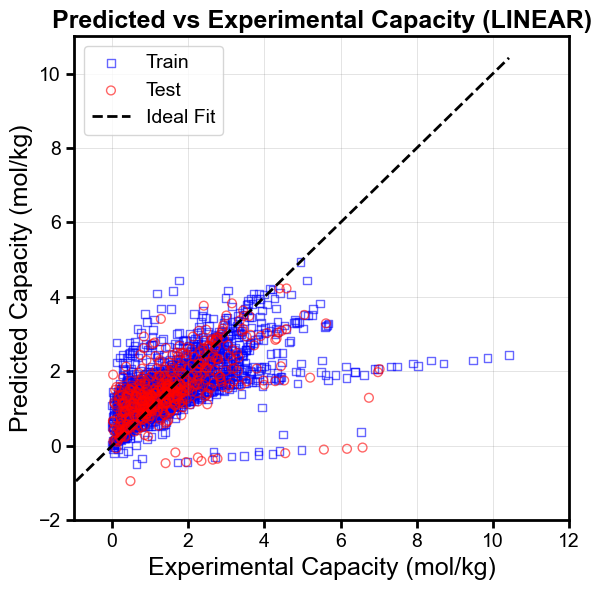

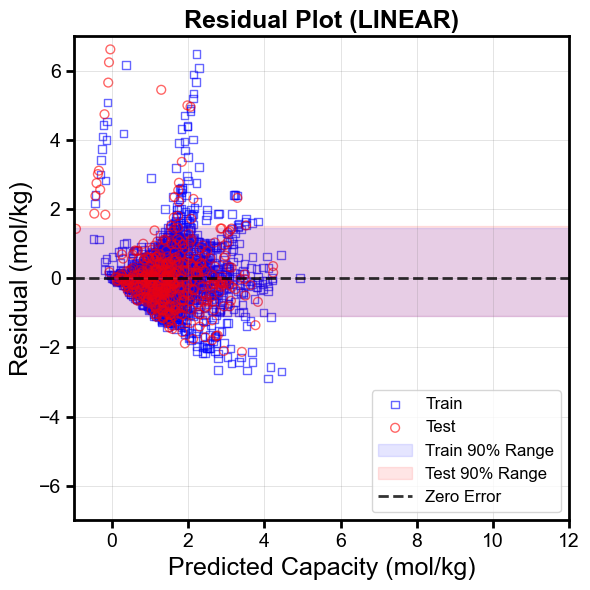

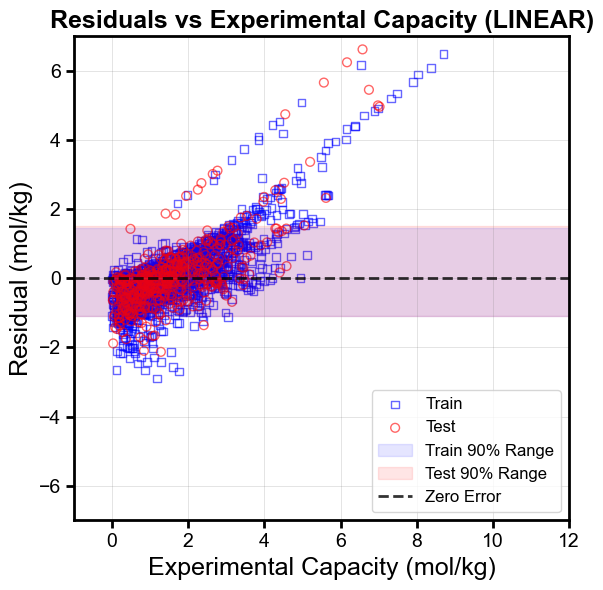

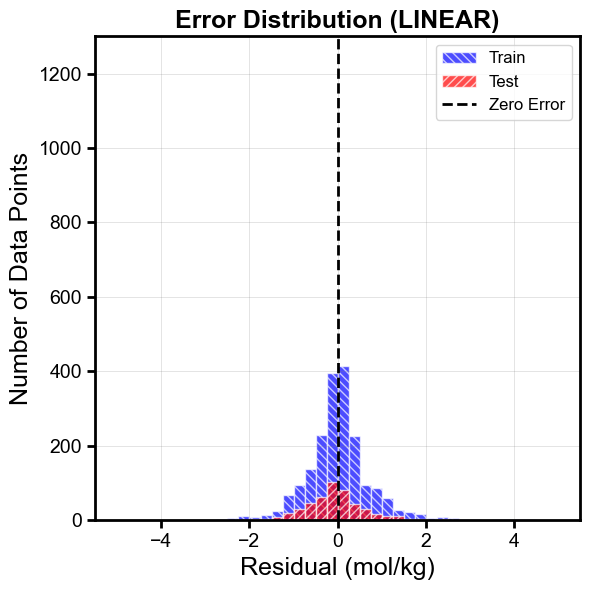

LINEAR Ê®°ÂûãËØ¶ÁªÜÁªüËÆ°‰ø°ÊÅØ
ÊúÄ‰Ω≥ÂèÇÊï∞: {'svr__C': 0.10257451272312866, 'svr__epsilon': 0.015982104772500425}
ËÆ≠ÁªÉÈõÜR¬≤: 0.3888
ÊµãËØïÈõÜR¬≤: 0.2601
ËÆ≠ÁªÉÈõÜMAE: 0.5667 mol/kg
ÊµãËØïÈõÜMAE: 0.6169 mol/kg
ËÆ≠ÁªÉÈõÜRMSE: 0.9458 mol/kg
ÊµãËØïÈõÜRMSE: 1.0101 mol/kg

üìä ÊÆãÂ∑ÆÂàÜÊûê - 90%Êï∞ÊçÆÁÇπËåÉÂõ¥:
ËÆ≠ÁªÉÈõÜ: 90.0% Âú® [-1.0948, 1.4674] mol/kg
ÊµãËØïÈõÜ: 90.0% Âú® [-1.0932, 1.5048] mol/kg

üìä ÊÆãÂ∑ÆÁªüËÆ°:
ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÂùáÂÄº: 0.0738 mol/kg (Ë∂äÊé•Ëøë0Ë∂äÂ•Ω)
ÊµãËØïÈõÜÊÆãÂ∑ÆÂùáÂÄº: 0.0637 mol/kg (Ë∂äÊé•Ëøë0Ë∂äÂ•Ω)
ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: 0.9431 mol/kg (Ë∂äÂ∞èË∂äÂ•Ω)
ÊµãËØïÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: 1.0091 mol/kg (Ë∂äÂ∞èË∂äÂ•Ω)

üìä ËØØÂ∑ÆÂú®[-0.25, 0.25]ËåÉÂõ¥ÂÜÖ:
ËÆ≠ÁªÉÈõÜ: 810/2000 Êï∞ÊçÆÁÇπ (40.5%)
ÊµãËØïÈõÜ: 186/500 Êï∞ÊçÆÁÇπ (37.2%)

üìä Ê®°ÂûãÊÄßËÉΩËØÑ‰º∞:
‚ùå ÈúÄË¶ÅÊîπËøõ: È¢ÑÊµãËØØÂ∑ÆËæÉÂ§ß
ËøáÊãüÂêàÁ®ãÂ∫¶: 0.0374 mol/kg

ÁîüÊàê RBF Ê†∏ÂáΩÊï∞ÁöÑÂèØËßÜÂåñÂõæË°®


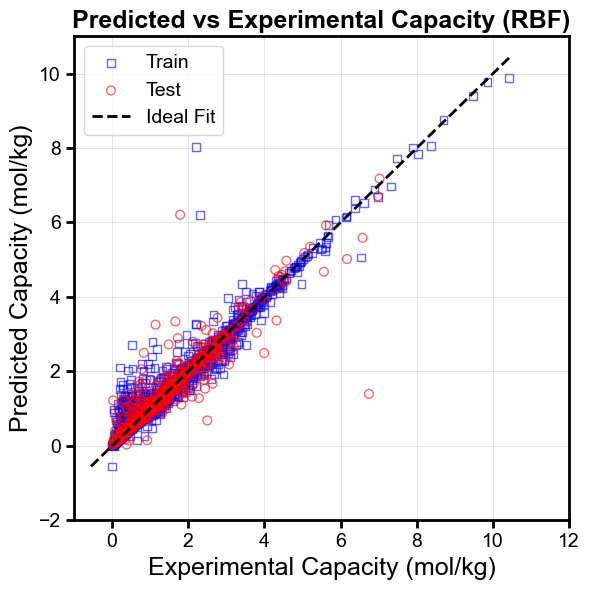

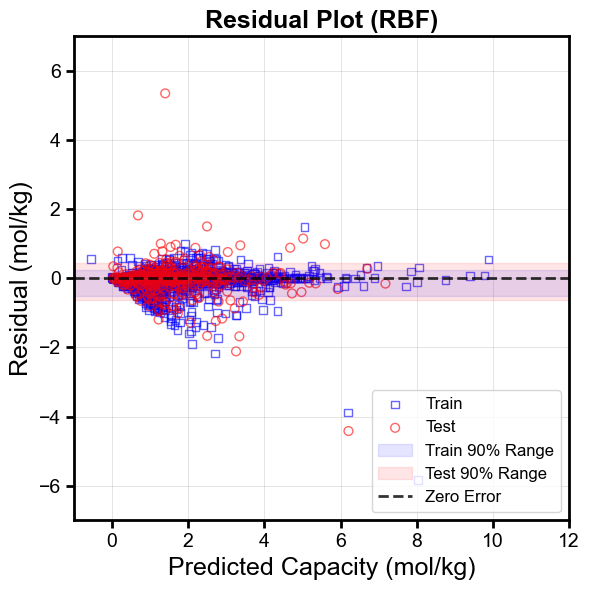

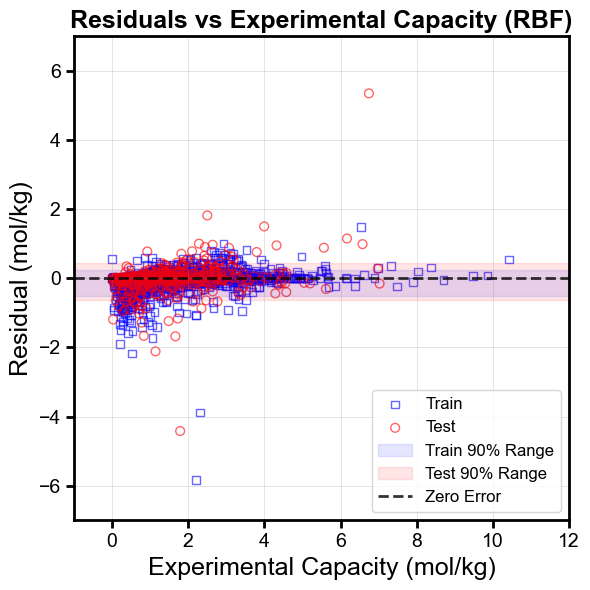

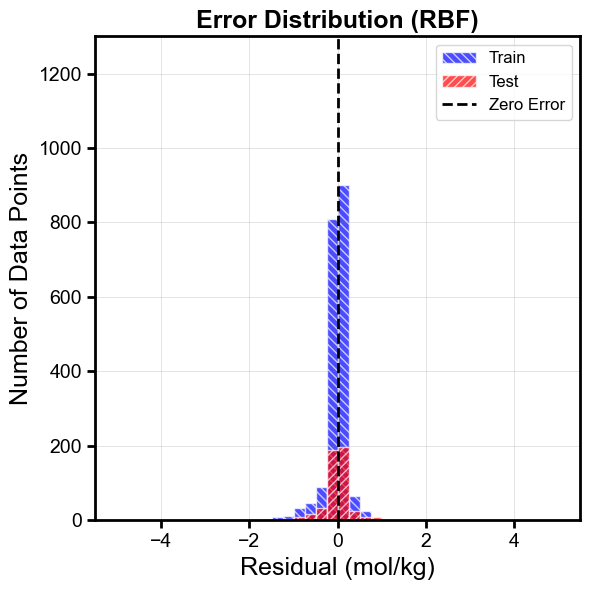

RBF Ê®°ÂûãËØ¶ÁªÜÁªüËÆ°‰ø°ÊÅØ
ÊúÄ‰Ω≥ÂèÇÊï∞: {'svr__C': 34.879281104286264, 'svr__epsilon': 0.006901630770467411, 'svr__gamma': 0.21197417334052496}
ËÆ≠ÁªÉÈõÜR¬≤: 0.9383
ÊµãËØïÈõÜR¬≤: 0.8440
ËÆ≠ÁªÉÈõÜMAE: 0.1268 mol/kg
ÊµãËØïÈõÜMAE: 0.2138 mol/kg
ËÆ≠ÁªÉÈõÜRMSE: 0.3006 mol/kg
ÊµãËØïÈõÜRMSE: 0.4639 mol/kg

üìä ÊÆãÂ∑ÆÂàÜÊûê - 90%Êï∞ÊçÆÁÇπËåÉÂõ¥:
ËÆ≠ÁªÉÈõÜ: 90.0% Âú® [-0.5157, 0.2410] mol/kg
ÊµãËØïÈõÜ: 90.0% Âú® [-0.6350, 0.4516] mol/kg

üìä ÊÆãÂ∑ÆÁªüËÆ°:
ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÂùáÂÄº: -0.0407 mol/kg (Ë∂äÊé•Ëøë0Ë∂äÂ•Ω)
ÊµãËØïÈõÜÊÆãÂ∑ÆÂùáÂÄº: -0.0250 mol/kg (Ë∂äÊé•Ëøë0Ë∂äÂ•Ω)
ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: 0.2979 mol/kg (Ë∂äÂ∞èË∂äÂ•Ω)
ÊµãËØïÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: 0.4637 mol/kg (Ë∂äÂ∞èË∂äÂ•Ω)

üìä ËØØÂ∑ÆÂú®[-0.25, 0.25]ËåÉÂõ¥ÂÜÖ:
ËÆ≠ÁªÉÈõÜ: 1711/2000 Êï∞ÊçÆÁÇπ (85.5%)
ÊµãËØïÈõÜ: 385/500 Êï∞ÊçÆÁÇπ (77.0%)

üìä Ê®°ÂûãÊÄßËÉΩËØÑ‰º∞:
‚ùå ÈúÄË¶ÅÊîπËøõ: È¢ÑÊµãËØØÂ∑ÆËæÉÂ§ß
ËøáÊãüÂêàÁ®ãÂ∫¶: 0.1193 mol/kg

ÁîüÊàê POLY Ê†∏ÂáΩÊï∞ÁöÑÂèØËßÜÂåñÂõæË°®


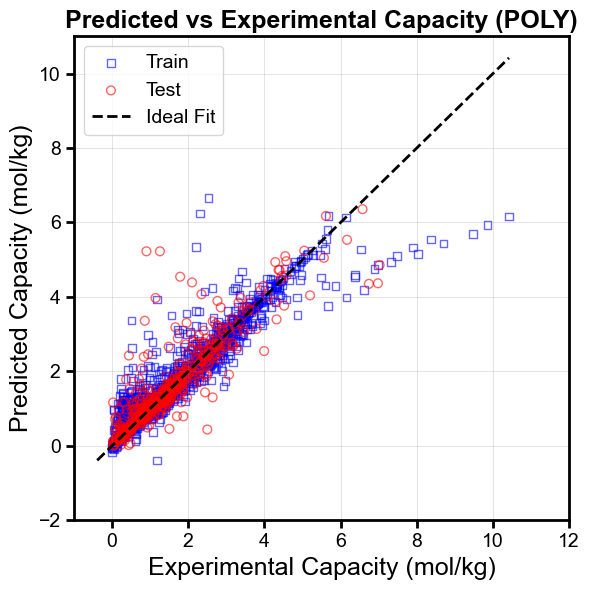

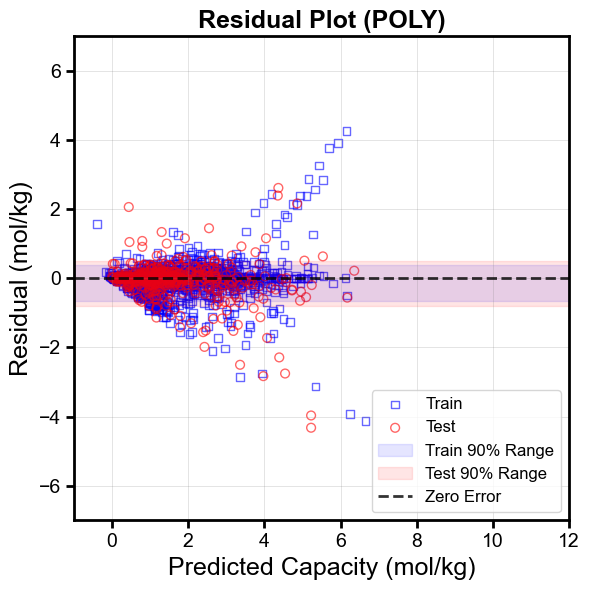

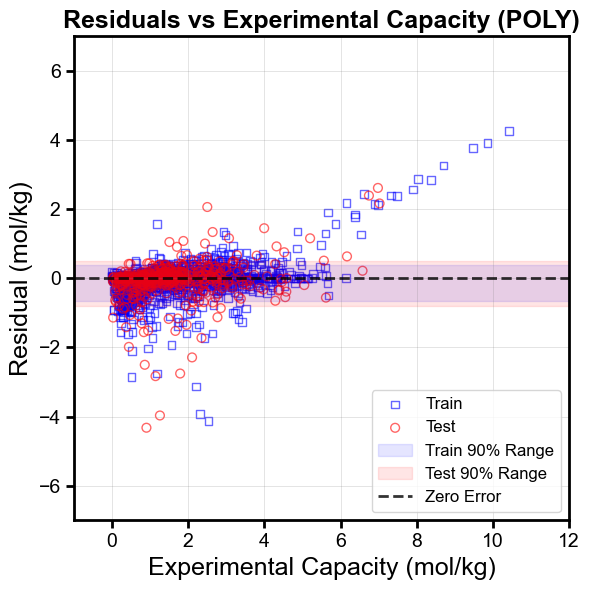

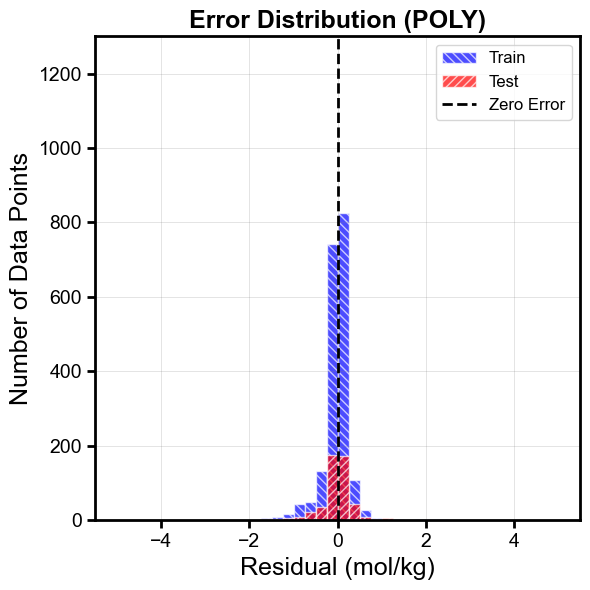

POLY Ê®°ÂûãËØ¶ÁªÜÁªüËÆ°‰ø°ÊÅØ
ÊúÄ‰Ω≥ÂèÇÊï∞: {'svr__C': 604.5915517293635, 'svr__coef0': 0.7495513992401993, 'svr__degree': 3, 'svr__epsilon': 0.008276508883382664}
ËÆ≠ÁªÉÈõÜR¬≤: 0.8726
ÊµãËØïÈõÜR¬≤: 0.7761
ËÆ≠ÁªÉÈõÜMAE: 0.1956 mol/kg
ÊµãËØïÈõÜMAE: 0.2861 mol/kg
ËÆ≠ÁªÉÈõÜRMSE: 0.4318 mol/kg
ÊµãËØïÈõÜRMSE: 0.5557 mol/kg

üìä ÊÆãÂ∑ÆÂàÜÊûê - 90%Êï∞ÊçÆÁÇπËåÉÂõ¥:
ËÆ≠ÁªÉÈõÜ: 90.0% Âú® [-0.6651, 0.3722] mol/kg
ÊµãËØïÈõÜ: 90.0% Âú® [-0.7995, 0.4950] mol/kg

üìä ÊÆãÂ∑ÆÁªüËÆ°:
ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÂùáÂÄº: -0.0317 mol/kg (Ë∂äÊé•Ëøë0Ë∂äÂ•Ω)
ÊµãËØïÈõÜÊÆãÂ∑ÆÂùáÂÄº: -0.0605 mol/kg (Ë∂äÊé•Ëøë0Ë∂äÂ•Ω)
ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: 0.4308 mol/kg (Ë∂äÂ∞èË∂äÂ•Ω)
ÊµãËØïÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: 0.5530 mol/kg (Ë∂äÂ∞èË∂äÂ•Ω)

üìä ËØØÂ∑ÆÂú®[-0.25, 0.25]ËåÉÂõ¥ÂÜÖ:
ËÆ≠ÁªÉÈõÜ: 1568/2000 Êï∞ÊçÆÁÇπ (78.4%)
ÊµãËØïÈõÜ: 347/500 Êï∞ÊçÆÁÇπ (69.4%)

üìä Ê®°ÂûãÊÄßËÉΩËØÑ‰º∞:
‚ùå ÈúÄË¶ÅÊîπËøõ: È¢ÑÊµãËØØÂ∑ÆËæÉÂ§ß
ËøáÊãüÂêàÁ®ãÂ∫¶: 0.1344 mol/kg

ÁîüÊàê SIGMOID Ê†∏ÂáΩÊï∞ÁöÑÂèØËßÜÂåñÂõæË°®


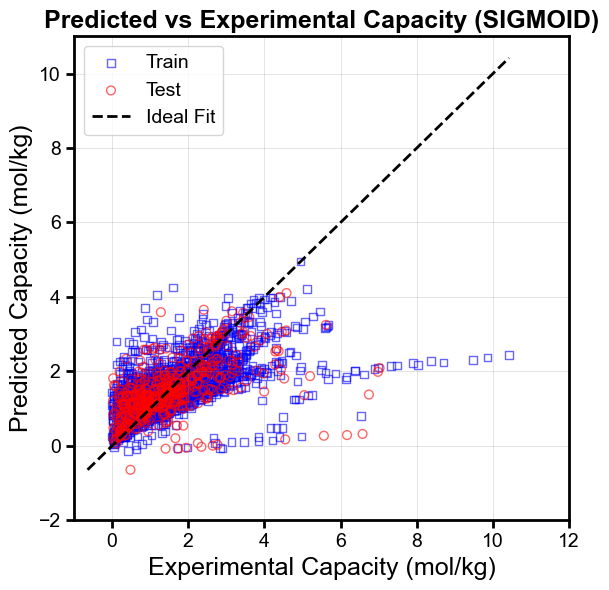

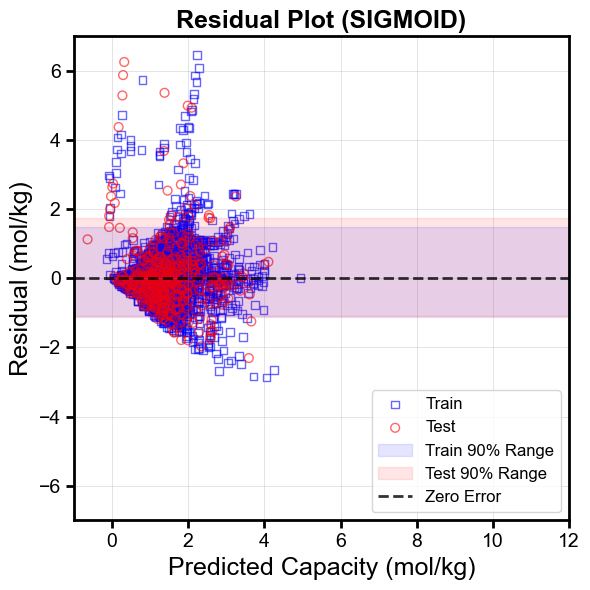

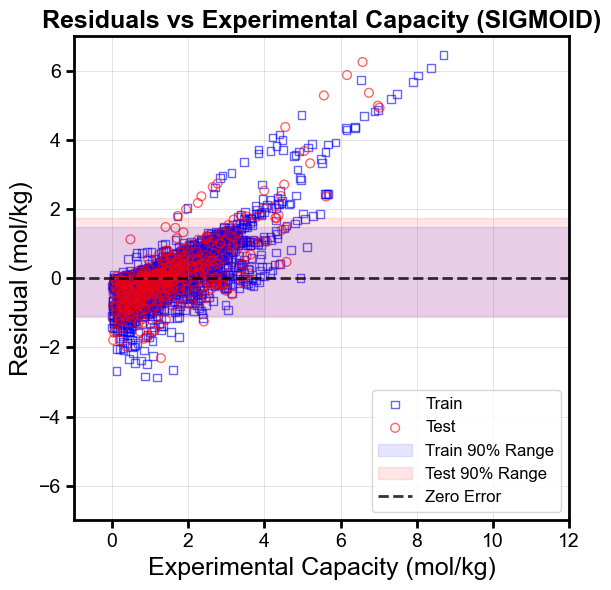

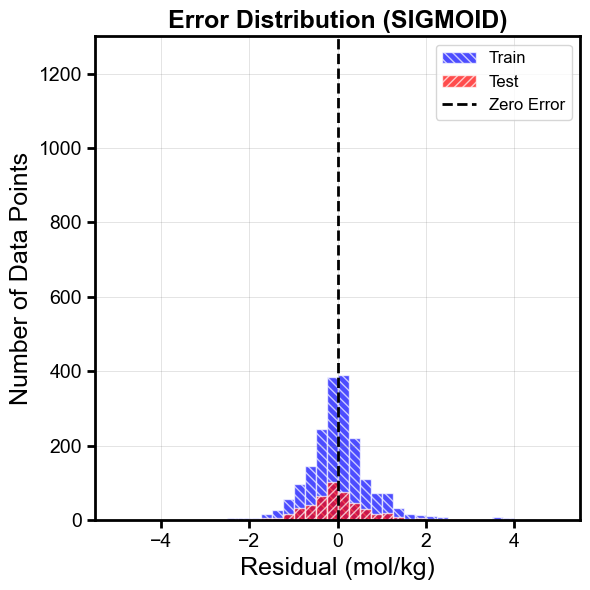

SIGMOID Ê®°ÂûãËØ¶ÁªÜÁªüËÆ°‰ø°ÊÅØ
ÊúÄ‰Ω≥ÂèÇÊï∞: {'svr__C': 265.923975925871, 'svr__coef0': 0.04844189034552504, 'svr__epsilon': 0.0012501565002126212, 'svr__gamma': 4.622351923490326e-05}
ËÆ≠ÁªÉÈõÜR¬≤: 0.3661
ÊµãËØïÈõÜR¬≤: 0.2766
ËÆ≠ÁªÉÈõÜMAE: 0.5818 mol/kg
ÊµãËØïÈõÜMAE: 0.6190 mol/kg
ËÆ≠ÁªÉÈõÜRMSE: 0.9632 mol/kg
ÊµãËØïÈõÜRMSE: 0.9989 mol/kg

üìä ÊÆãÂ∑ÆÂàÜÊûê - 90%Êï∞ÊçÆÁÇπËåÉÂõ¥:
ËÆ≠ÁªÉÈõÜ: 90.0% Âú® [-1.0941, 1.4900] mol/kg
ÊµãËØïÈõÜ: 90.0% Âú® [-1.1092, 1.7545] mol/kg

üìä ÊÆãÂ∑ÆÁªüËÆ°:
ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÂùáÂÄº: 0.0939 mol/kg (Ë∂äÊé•Ëøë0Ë∂äÂ•Ω)
ÊµãËØïÈõÜÊÆãÂ∑ÆÂùáÂÄº: 0.0835 mol/kg (Ë∂äÊé•Ëøë0Ë∂äÂ•Ω)
ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: 0.9588 mol/kg (Ë∂äÂ∞èË∂äÂ•Ω)
ÊµãËØïÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: 0.9964 mol/kg (Ë∂äÂ∞èË∂äÂ•Ω)

üìä ËØØÂ∑ÆÂú®[-0.25, 0.25]ËåÉÂõ¥ÂÜÖ:
ËÆ≠ÁªÉÈõÜ: 776/2000 Êï∞ÊçÆÁÇπ (38.8%)
ÊµãËØïÈõÜ: 181/500 Êï∞ÊçÆÁÇπ (36.2%)

üìä Ê®°ÂûãÊÄßËÉΩËØÑ‰º∞:
‚ùå ÈúÄË¶ÅÊîπËøõ: È¢ÑÊµãËØØÂ∑ÆËæÉÂ§ß
ËøáÊãüÂêàÁ®ãÂ∫¶: 0.2645 mol/kg


In [33]:
# ‰ªéresults‰∏≠ÁöÑÂèÇÊï∞ÈáçÊñ∞ÂàõÂª∫Ê®°Âûã
models = {}

for kernel_name in ['linear', 'rbf', 'poly', 'sigmoid']:
    if kernel_name in results and 'best_params' in results[kernel_name]:
        print(f"ÈáçÊñ∞ÂàõÂª∫ {kernel_name} Ê®°Âûã...")
        
        # ÂàõÂª∫ÁÆ°ÈÅì
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('svr', SVR(kernel=kernel_name))
        ])
        
        # ËÆæÁΩÆÊúÄ‰Ω≥ÂèÇÊï∞
        pipeline.set_params(**results[kernel_name]['best_params'])
        
        # ÈáçÊñ∞ËÆ≠ÁªÉÊ®°Âûã
        pipeline.fit(X_train, y_train)
        
        models[kernel_name] = {
            'model': pipeline,
            'params': results[kernel_name]['best_params']
        }
        
        # ËØÑ‰º∞Ê®°ÂûãÊÄßËÉΩ
        train_score = pipeline.score(X_train, y_train)
        test_score = pipeline.score(X_test, y_test)
        print(f"{kernel_name} - ËÆ≠ÁªÉÈõÜR¬≤: {train_score:.4f}, ÊµãËØïÈõÜR¬≤: {test_score:.4f}")

print("ÊàêÂäüÈáçÊñ∞ÂàõÂª∫ÁöÑÊ®°Âûã:", list(models.keys()))

# Áé∞Âú®ÂèØ‰ª•‰ΩøÁî®modelsÂ≠óÂÖ∏ËøõË°åÂèØËßÜÂåñ
if models:
    # Â≠òÂÇ®ÊâÄÊúâÊ®°ÂûãÁöÑÁªìÊûú
    eval_results = {}
    
    # ‰∏∫ÊØè‰∏™Ê†∏ÂáΩÊï∞ÁîüÊàêÂõæË°®
    for kernel_name, model_info in models.items():
        print(f"\n{'='*80}")
        print(f"ÁîüÊàê {kernel_name.upper()} Ê†∏ÂáΩÊï∞ÁöÑÂèØËßÜÂåñÂõæË°®")
        print(f"{'='*80}")
        
        metrics = plot_model_evaluation(
            kernel_name=kernel_name.upper(),
            model=model_info['model'],
            X_train=X_train,
            y_train=y_train,
            X_test=X_test,
            y_test=y_test,
            best_params=model_info['params']
        )
        
        eval_results[kernel_name] = metrics
else:
    print("Ê≤°ÊúâÊàêÂäüÂàõÂª∫‰ªª‰ΩïÊ®°Âûã")

In [34]:
def plot_model_evaluation(kernel_name, model, X_train, y_train, X_test, y_test, best_params):
    """‰∏∫ÊØè‰∏™Ê†∏ÂáΩÊï∞Ê®°ÂûãÁîüÊàêÂõõÁßçÂèØËßÜÂåñÂõæË°®"""
    
    # Ëé∑ÂèñÈ¢ÑÊµãÂÄº
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # ËÆ°ÁÆóËØØÂ∑Æ
    train_errors = y_train - y_train_pred
    test_errors = y_test - y_test_pred
    
    # ËÆ°ÁÆóËØÑ‰º∞ÊåáÊ†á
    train_r2, train_mae, train_mse, train_rmse, train_aard = calculate_metrics(y_train, y_train_pred)
    test_r2, test_mae, test_mse, test_rmse, test_aard = calculate_metrics(y_test, y_test_pred)
    
    # ËÆ°ÁÆó90%ËåÉÂõ¥
    train_lower, train_upper, train_percentage = calculate_90_percent_range(train_errors)
    test_lower, test_upper, test_percentage = calculate_90_percent_range(test_errors)
    
    # ËÆ°ÁÆóËØØÂ∑ÆÂú®[-0.25, 0.25]ËåÉÂõ¥ÂÜÖÁöÑÁôæÂàÜÊØî
    def calculate_error_in_range(errors, lower_bound, upper_bound):
        in_range = np.sum((errors >= lower_bound) & (errors <= upper_bound))
        percentage = (in_range / len(errors)) * 100
        return in_range, percentage
    
    train_in_025, train_percent_025 = calculate_error_in_range(train_errors, -0.25, 0.25)
    test_in_025, test_percent_025 = calculate_error_in_range(test_errors, -0.25, 0.25)
    
    # ËÆæÁΩÆÂÖ®Â±ÄÊ†∑ÂºèÂèÇÊï∞
    border_width = 2.0  # Â§ñÊ°ÜÁ≤óÁªÜ
    tick_fontsize = 14  # ÂùêÊ†áËΩ¥Ê†áÂ∞∫Â≠óÂè∑
    label_fontsize = 16  # ÂùêÊ†áËΩ¥Ê†áÁ≠æÂ≠óÂè∑
    title_fontsize = 18  # Ê†áÈ¢òÂ≠óÂè∑
    tick_width = 2.0    # ÂàªÂ∫¶Á∫øÁ≤óÁªÜ
    tick_length = 6     # ÂàªÂ∫¶Á∫øÈïøÂ∫¶
    
    # 1. È¢ÑÊµãÂÄº‰∏éÁúüÂÆûÂÄºÂØπÊØîÂõæ
    plt.figure(figsize=(6, 6))
    ax = plt.gca()
    # ËÆæÁΩÆÂ§ñÊ°ÜÁ≤óÁªÜÂíåÈ¢úËâ≤
    for spine in ax.spines.values():
        spine.set_linewidth(border_width)
        spine.set_color('black')
    
    plt.scatter(y_train, y_train_pred, color='none', edgecolor='blue', 
               alpha=0.6, s=30, label="Train", linewidth=1, marker='s')
    plt.scatter(y_test, y_test_pred, color='none', edgecolor='red', 
               alpha=0.6, s=40, label="Test", linewidth=1, marker='o')
    
    min_val = min(min(y_train), min(y_test), min(y_train_pred), min(y_test_pred))
    max_val = max(max(y_train), max(y_test), max(y_train_pred), max(y_test_pred))
    plt.plot([min_val, max_val], [min_val, max_val], color='black', 
             linestyle='--', linewidth=2, label='Ideal Fit')
    
    # ËÆæÁΩÆÂùêÊ†áËΩ¥ËåÉÂõ¥
    plt.ylim(-2, 11)
    plt.xlim(-1, 12)
    
    plt.xlabel("Experimental Capacity (mol/kg)", fontsize=18, fontname='Arial')
    plt.ylabel("Predicted Capacity (mol/kg)", fontsize=18, fontname='Arial')
    plt.title(f"Predicted vs Experimental Capacity ({kernel_name})", fontsize=title_fontsize, fontweight='bold', fontname='Arial')
    plt.legend(loc='upper left', prop={'family': 'Arial', 'size': 14})
    
    # ËÆæÁΩÆÂàªÂ∫¶Á∫ø
    plt.tick_params(axis='x', which='major', width=tick_width, length=tick_length, 
                   color='black', labelcolor='black', bottom=True, top=False)
    plt.tick_params(axis='y', which='major', width=tick_width, length=tick_length,
                   color='black', labelcolor='black', left=True, right=False)
    
    # ËÆæÁΩÆÂùêÊ†áËΩ¥Ê†áÂ∞∫Â≠óÂè∑
    plt.xticks(fontname='Arial', fontsize=18)
    plt.yticks(fontname='Arial', fontsize=18)
    
    plt.grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    
    # 2. ÊÆãÂ∑Æ vs È¢ÑÊµãÂÄºÂõæ
    plt.figure(figsize=(6, 6))
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_linewidth(border_width)
        spine.set_color('black')
    
    plt.scatter(y_train_pred, train_errors, alpha=0.6, s=30, color='none', 
                edgecolor='blue', linewidth=1, label='Train', marker='s')
    plt.scatter(y_test_pred, test_errors, alpha=0.6, s=40, color='none', 
                edgecolor='red', linewidth=1, label='Test', marker='o')
    
    plt.axhspan(train_lower, train_upper, alpha=0.1, color='blue', label='Train 90% Range')
    plt.axhspan(test_lower, test_upper, alpha=0.1, color='red', label='Test 90% Range')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2, alpha=0.8, label='Zero Error')
    
    # ËÆæÁΩÆÂùêÊ†áËΩ¥ËåÉÂõ¥
    plt.ylim(-7, 7)
    plt.xlim(-1, 12)
    
    plt.xlabel('Predicted Capacity (mol/kg)', fontsize=18, fontname='Arial')
    plt.ylabel('Residual (mol/kg)', fontsize=18, fontname='Arial')
    plt.title(f'Residual Plot ({kernel_name})', fontsize=title_fontsize, fontweight='bold', fontname='Arial')
    plt.legend(loc='lower right', prop={'family': 'Arial', 'size': 12})
    
    # ËÆæÁΩÆÂàªÂ∫¶Á∫ø
    plt.tick_params(axis='x', which='major', width=tick_width, length=tick_length, 
                   color='black', labelcolor='black', bottom=True, top=False)
    plt.tick_params(axis='y', which='major', width=tick_width, length=tick_length,
                   color='black', labelcolor='black', left=True, right=False)
    
    plt.xticks(fontname='Arial', fontsize=18)
    plt.yticks(fontname='Arial', fontsize=18)
    
    plt.grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    
    # 3. ÊÆãÂ∑Æ vs ÂÆûÈ™åÂÄºÂõæ
    plt.figure(figsize=(6, 6))
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_linewidth(border_width)
        spine.set_color('black')
    
    plt.scatter(y_train, train_errors, alpha=0.6, s=30, color='none', 
                edgecolor='blue', linewidth=1, label='Train', marker='s')
    plt.scatter(y_test, test_errors, alpha=0.6, s=40, color='none', 
                edgecolor='red', linewidth=1, label='Test', marker='o')
    
    plt.axhspan(train_lower, train_upper, alpha=0.1, color='blue', label='Train 90% Range')
    plt.axhspan(test_lower, test_upper, alpha=0.1, color='red', label='Test 90% Range')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2, alpha=0.8, label='Zero Error')
    
    # ËÆæÁΩÆÂùêÊ†áËΩ¥ËåÉÂõ¥
    plt.ylim(-7, 7)
    plt.xlim(-1, 12)
    
    plt.xlabel('Experimental Capacity (mol/kg)', fontsize=18, fontname='Arial')
    plt.ylabel('Residual (mol/kg)', fontsize=18, fontname='Arial')
    plt.title(f'Residuals vs Experimental Capacity ({kernel_name})', fontsize=title_fontsize, fontweight='bold', fontname='Arial')
    plt.legend(loc='lower right', prop={'family': 'Arial', 'size': 12})
    
    # ËÆæÁΩÆÂàªÂ∫¶Á∫ø
    plt.tick_params(axis='x', which='major', width=tick_width, length=tick_length, 
                   color='black', labelcolor='black', bottom=True, top=False)
    plt.tick_params(axis='y', which='major', width=tick_width, length=tick_length,
                   color='black', labelcolor='black', left=True, right=False)
    
    plt.xticks(fontname='Arial', fontsize=18)
    plt.yticks(fontname='Arial', fontsize=18)
    
    plt.grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    
    # 4. ËØØÂ∑ÆÂàÜÂ∏ÉÂõæÔºàÊåâÊåáÂÆöÂå∫Èó¥ÂàíÂàÜÔºâ
    plt.figure(figsize=(6, 6))
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_linewidth(border_width)
        spine.set_color('black')
    
    # ÊåâÁÖßÊåáÂÆöÁöÑÂå∫Èó¥ÂàíÂàÜÔºö0.25‰∏∫Èó¥Èöî
    bin_edges = []
    current = 0
    max_error = max(np.abs(train_errors.max()), np.abs(test_errors.max()))
    
    # ÁîüÊàêÂå∫Èó¥ËæπÁïå
    while current <= max_error + 0.25:
        bin_edges.extend([-current - 0.25, -current])
        if current != 0:
            bin_edges.extend([current, current + 0.25])
        current += 0.25
    
    # ÊéíÂ∫èÂπ∂ÂéªÈáç
    bin_edges = sorted(set(bin_edges))
    
    # ÁªòÂà∂ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜËØØÂ∑ÆÂàÜÂ∏É
    plt.hist(train_errors, bins=bin_edges, alpha=0.7, color='blue', 
             edgecolor='white', label='Train', density=False, hatch='\\\\\\\\')
    plt.hist(test_errors, bins=bin_edges, alpha=0.7, color='red', 
             edgecolor='white', label='Test', density=False, hatch='////')
    plt.axvline(x=0, color='black', linestyle='--', linewidth=2, label='Zero Error')
    
    # ËÆæÁΩÆÂùêÊ†áËΩ¥ËåÉÂõ¥
    plt.ylim(0, 1300)
    plt.xlim(-5.5, 5.5)
    
    plt.xlabel('Residual (mol/kg)', fontsize=18, fontname='Arial')
    plt.ylabel('Number of Data Points', fontsize=18, fontname='Arial')
    plt.title(f'Error Distribution ({kernel_name})', fontsize=title_fontsize, fontweight='bold', fontname='Arial')
    plt.legend(loc='upper right', prop={'family': 'Arial', 'size': 12})
    
    # ËÆæÁΩÆÂàªÂ∫¶Á∫ø
    plt.tick_params(axis='x', which='major', width=tick_width, length=tick_length, 
                   color='black', labelcolor='black', bottom=True, top=False)
    plt.tick_params(axis='y', which='major', width=tick_width, length=tick_length,
                   color='black', labelcolor='black', left=True, right=False)
    
    plt.xticks(fontname='Arial', fontsize=18)
    plt.yticks(fontname='Arial', fontsize=18)
    
    plt.grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    
    # ÊâìÂç∞ËØ¶ÁªÜÁöÑÁªüËÆ°‰ø°ÊÅØ
    print("="*80)
    print(f"{kernel_name} Ê®°ÂûãËØ¶ÁªÜÁªüËÆ°‰ø°ÊÅØ")
    print("="*80)
    
    # Âü∫Êú¨ÊÄßËÉΩÊåáÊ†á
    print(f"ÊúÄ‰Ω≥ÂèÇÊï∞: {best_params}")
    print(f"ËÆ≠ÁªÉÈõÜR¬≤: {train_r2:.4f}")
    print(f"ÊµãËØïÈõÜR¬≤: {test_r2:.4f}")
    print(f"ËÆ≠ÁªÉÈõÜMAE: {train_mae:.4f} mol/kg")
    print(f"ÊµãËØïÈõÜMAE: {test_mae:.4f} mol/kg")
    print(f"ËÆ≠ÁªÉÈõÜRMSE: {train_rmse:.4f} mol/kg")
    print(f"ÊµãËØïÈõÜRMSE: {test_rmse:.4f} mol/kg")
    
    # ÊÆãÂ∑ÆÂàÜÊûêÊï∞ÊçÆ
    print(f"\nüìä ÊÆãÂ∑ÆÂàÜÊûê - 90%Êï∞ÊçÆÁÇπËåÉÂõ¥:")
    print(f"ËÆ≠ÁªÉÈõÜ: {train_percentage:.1f}% Âú® [{train_lower:.4f}, {train_upper:.4f}] mol/kg")
    print(f"ÊµãËØïÈõÜ: {test_percentage:.1f}% Âú® [{test_lower:.4f}, {test_upper:.4f}] mol/kg")
    
    print(f"\nüìä ÊÆãÂ∑ÆÁªüËÆ°:")
    print(f"ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÂùáÂÄº: {train_errors.mean():.4f} mol/kg (Ë∂äÊé•Ëøë0Ë∂äÂ•Ω)")
    print(f"ÊµãËØïÈõÜÊÆãÂ∑ÆÂùáÂÄº: {test_errors.mean():.4f} mol/kg (Ë∂äÊé•Ëøë0Ë∂äÂ•Ω)")
    print(f"ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: {train_errors.std():.4f} mol/kg (Ë∂äÂ∞èË∂äÂ•Ω)")
    print(f"ÊµãËØïÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: {test_errors.std():.4f} mol/kg (Ë∂äÂ∞èË∂äÂ•Ω)")
    
    # ËØØÂ∑ÆÂå∫Èó¥ÁªüËÆ°
    print(f"\nüìä ËØØÂ∑ÆÂú®[-0.25, 0.25]ËåÉÂõ¥ÂÜÖ:")
    print(f"ËÆ≠ÁªÉÈõÜ: {train_in_025}/{len(train_errors)} Êï∞ÊçÆÁÇπ ({train_percent_025:.1f}%)")
    print(f"ÊµãËØïÈõÜ: {test_in_025}/{len(test_errors)} Êï∞ÊçÆÁÇπ ({test_percent_025:.1f}%)")
    
    # Ê®°ÂûãÊÄßËÉΩËØÑ‰º∞
    print(f"\nüìä Ê®°ÂûãÊÄßËÉΩËØÑ‰º∞:")
    max_train_error = max(abs(train_lower), abs(train_upper))
    max_test_error = max(abs(test_lower), abs(test_upper))
    
    if max_test_error < 0.1:
        print("‚úÖ ‰ºòÁßÄ: 90%È¢ÑÊµãËØØÂ∑Æ < 0.1 mol/kg")
    elif max_test_error < 0.2:
        print("üëç ËâØÂ•Ω: 90%È¢ÑÊµãËØØÂ∑Æ < 0.2 mol/kg")
    elif max_test_error < 0.3:
        print("‚ö†Ô∏è ‰∏ÄËà¨: 90%È¢ÑÊµãËØØÂ∑Æ < 0.3 mol/kg")
    else:
        print("‚ùå ÈúÄË¶ÅÊîπËøõ: È¢ÑÊµãËØØÂ∑ÆËæÉÂ§ß")
    
    print(f"ËøáÊãüÂêàÁ®ãÂ∫¶: {abs(max_train_error - max_test_error):.4f} mol/kg")
    
    return {
        'train_r2': train_r2, 'test_r2': test_r2,
        'train_mae': train_mae, 'test_mae': test_mae,
        'train_mse': train_mse, 'test_mse': test_mse,
        'train_rmse': train_rmse, 'test_rmse': test_rmse,
        'train_aard': train_aard, 'test_aard': test_aard,
        'train_90_range': (train_lower, train_upper, train_percentage),
        'test_90_range': (test_lower, test_upper, test_percentage),
        'train_in_025': (train_in_025, train_percent_025),
        'test_in_025': (test_in_025, test_percent_025)
    }

ÈáçÊñ∞ÂàõÂª∫ linear Ê®°Âûã...
linear - ËÆ≠ÁªÉÈõÜR¬≤: 0.3888, ÊµãËØïÈõÜR¬≤: 0.2601
ÈáçÊñ∞ÂàõÂª∫ rbf Ê®°Âûã...
rbf - ËÆ≠ÁªÉÈõÜR¬≤: 0.9383, ÊµãËØïÈõÜR¬≤: 0.8440
ÈáçÊñ∞ÂàõÂª∫ poly Ê®°Âûã...
poly - ËÆ≠ÁªÉÈõÜR¬≤: 0.8726, ÊµãËØïÈõÜR¬≤: 0.7761
ÈáçÊñ∞ÂàõÂª∫ sigmoid Ê®°Âûã...
sigmoid - ËÆ≠ÁªÉÈõÜR¬≤: 0.3661, ÊµãËØïÈõÜR¬≤: 0.2766
ÊàêÂäüÈáçÊñ∞ÂàõÂª∫ÁöÑÊ®°Âûã: ['linear', 'rbf', 'poly', 'sigmoid']

ÁîüÊàê LINEAR Ê†∏ÂáΩÊï∞ÁöÑÂèØËßÜÂåñÂõæË°®


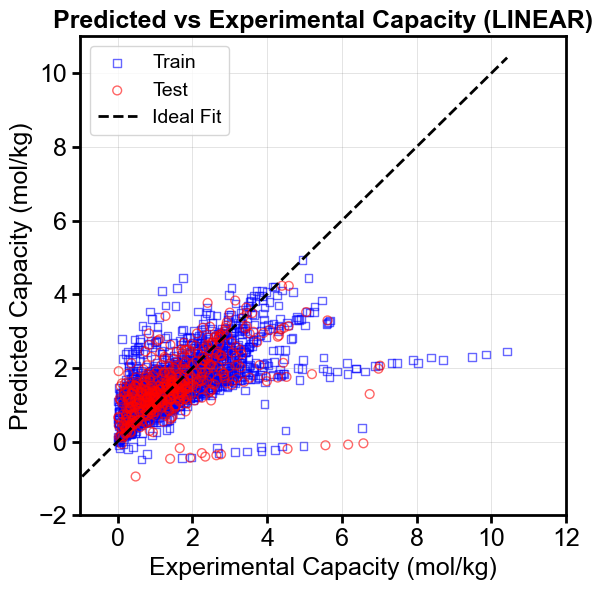

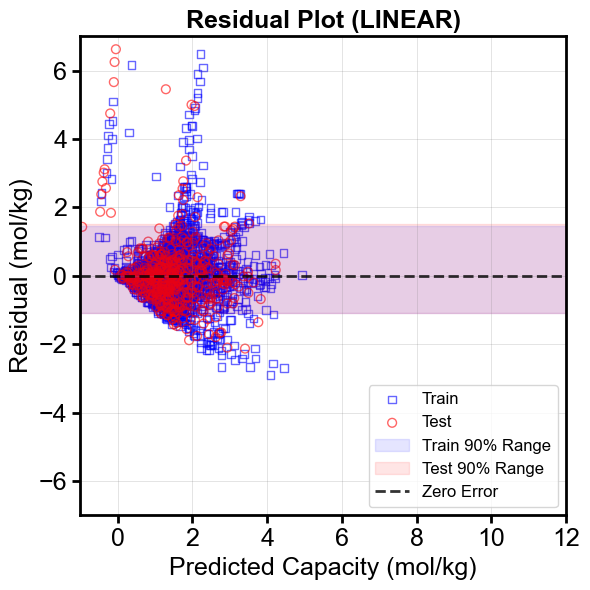

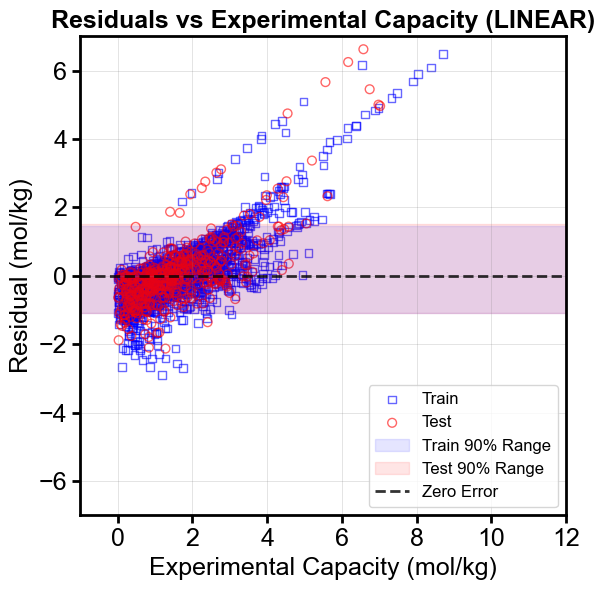

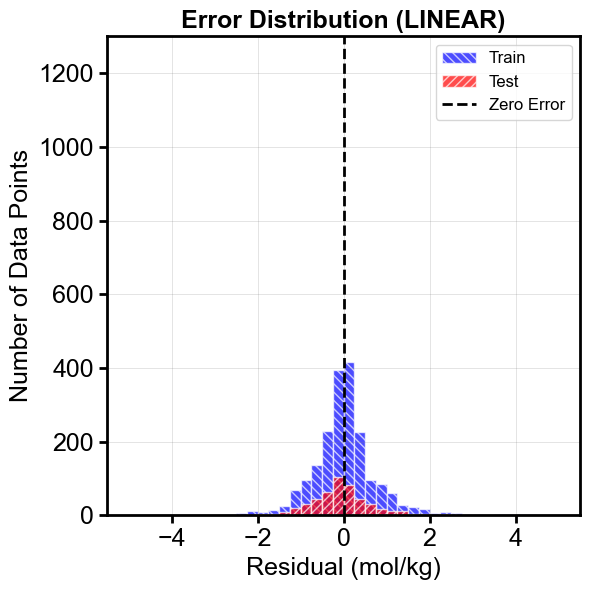

LINEAR Ê®°ÂûãËØ¶ÁªÜÁªüËÆ°‰ø°ÊÅØ
ÊúÄ‰Ω≥ÂèÇÊï∞: {'svr__C': 0.10257451272312866, 'svr__epsilon': 0.015982104772500425}
ËÆ≠ÁªÉÈõÜR¬≤: 0.3888
ÊµãËØïÈõÜR¬≤: 0.2601
ËÆ≠ÁªÉÈõÜMAE: 0.5667 mol/kg
ÊµãËØïÈõÜMAE: 0.6169 mol/kg
ËÆ≠ÁªÉÈõÜRMSE: 0.9458 mol/kg
ÊµãËØïÈõÜRMSE: 1.0101 mol/kg

üìä ÊÆãÂ∑ÆÂàÜÊûê - 90%Êï∞ÊçÆÁÇπËåÉÂõ¥:
ËÆ≠ÁªÉÈõÜ: 90.0% Âú® [-1.0948, 1.4674] mol/kg
ÊµãËØïÈõÜ: 90.0% Âú® [-1.0932, 1.5048] mol/kg

üìä ÊÆãÂ∑ÆÁªüËÆ°:
ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÂùáÂÄº: 0.0738 mol/kg (Ë∂äÊé•Ëøë0Ë∂äÂ•Ω)
ÊµãËØïÈõÜÊÆãÂ∑ÆÂùáÂÄº: 0.0637 mol/kg (Ë∂äÊé•Ëøë0Ë∂äÂ•Ω)
ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: 0.9431 mol/kg (Ë∂äÂ∞èË∂äÂ•Ω)
ÊµãËØïÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: 1.0091 mol/kg (Ë∂äÂ∞èË∂äÂ•Ω)

üìä ËØØÂ∑ÆÂú®[-0.25, 0.25]ËåÉÂõ¥ÂÜÖ:
ËÆ≠ÁªÉÈõÜ: 810/2000 Êï∞ÊçÆÁÇπ (40.5%)
ÊµãËØïÈõÜ: 186/500 Êï∞ÊçÆÁÇπ (37.2%)

üìä Ê®°ÂûãÊÄßËÉΩËØÑ‰º∞:
‚ùå ÈúÄË¶ÅÊîπËøõ: È¢ÑÊµãËØØÂ∑ÆËæÉÂ§ß
ËøáÊãüÂêàÁ®ãÂ∫¶: 0.0374 mol/kg

ÁîüÊàê RBF Ê†∏ÂáΩÊï∞ÁöÑÂèØËßÜÂåñÂõæË°®


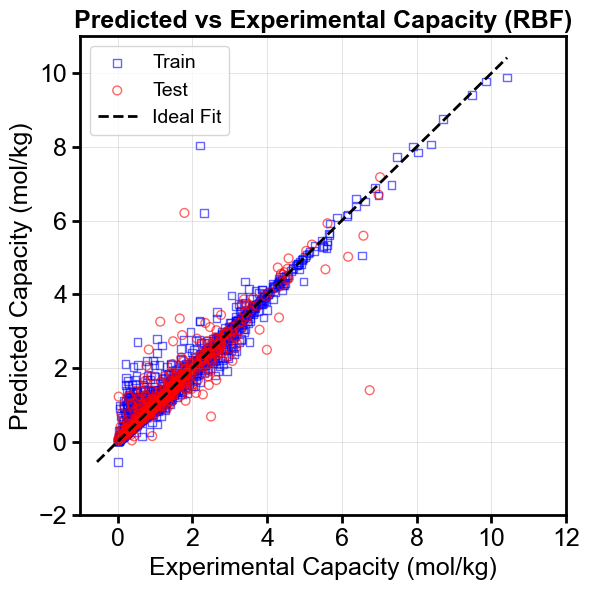

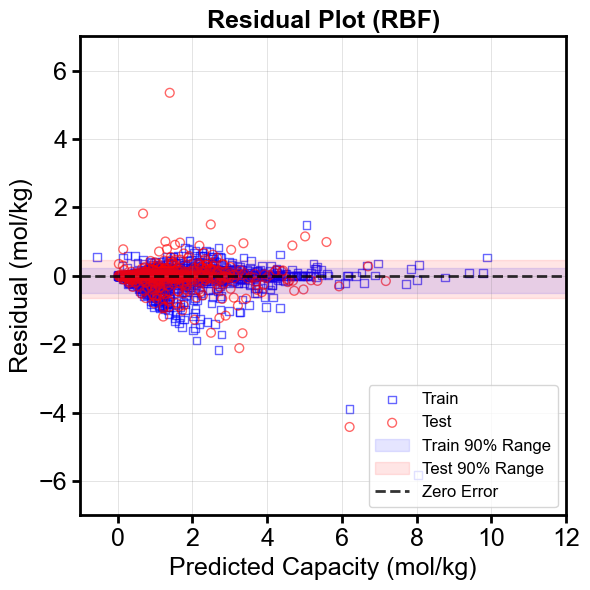

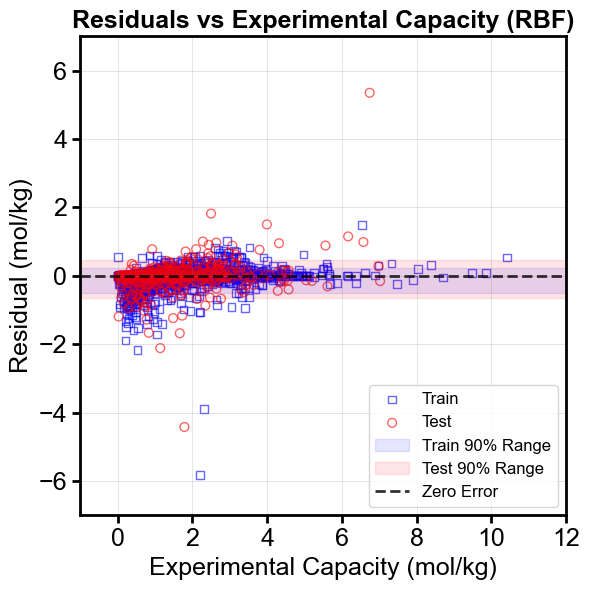

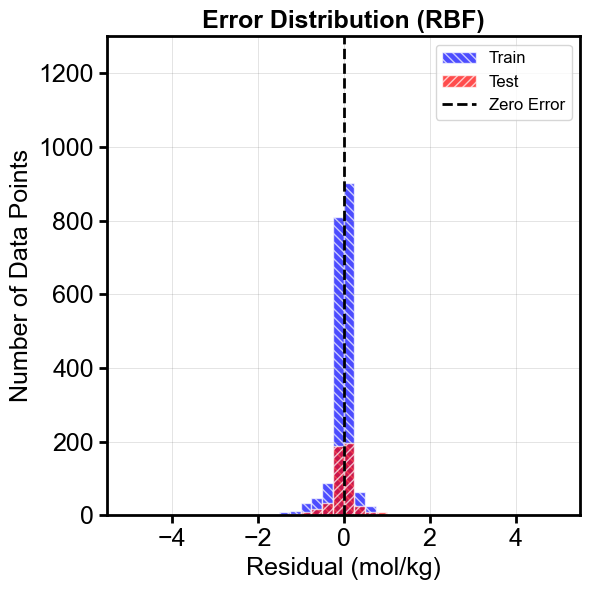

RBF Ê®°ÂûãËØ¶ÁªÜÁªüËÆ°‰ø°ÊÅØ
ÊúÄ‰Ω≥ÂèÇÊï∞: {'svr__C': 34.879281104286264, 'svr__epsilon': 0.006901630770467411, 'svr__gamma': 0.21197417334052496}
ËÆ≠ÁªÉÈõÜR¬≤: 0.9383
ÊµãËØïÈõÜR¬≤: 0.8440
ËÆ≠ÁªÉÈõÜMAE: 0.1268 mol/kg
ÊµãËØïÈõÜMAE: 0.2138 mol/kg
ËÆ≠ÁªÉÈõÜRMSE: 0.3006 mol/kg
ÊµãËØïÈõÜRMSE: 0.4639 mol/kg

üìä ÊÆãÂ∑ÆÂàÜÊûê - 90%Êï∞ÊçÆÁÇπËåÉÂõ¥:
ËÆ≠ÁªÉÈõÜ: 90.0% Âú® [-0.5157, 0.2410] mol/kg
ÊµãËØïÈõÜ: 90.0% Âú® [-0.6350, 0.4516] mol/kg

üìä ÊÆãÂ∑ÆÁªüËÆ°:
ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÂùáÂÄº: -0.0407 mol/kg (Ë∂äÊé•Ëøë0Ë∂äÂ•Ω)
ÊµãËØïÈõÜÊÆãÂ∑ÆÂùáÂÄº: -0.0250 mol/kg (Ë∂äÊé•Ëøë0Ë∂äÂ•Ω)
ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: 0.2979 mol/kg (Ë∂äÂ∞èË∂äÂ•Ω)
ÊµãËØïÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: 0.4637 mol/kg (Ë∂äÂ∞èË∂äÂ•Ω)

üìä ËØØÂ∑ÆÂú®[-0.25, 0.25]ËåÉÂõ¥ÂÜÖ:
ËÆ≠ÁªÉÈõÜ: 1711/2000 Êï∞ÊçÆÁÇπ (85.5%)
ÊµãËØïÈõÜ: 385/500 Êï∞ÊçÆÁÇπ (77.0%)

üìä Ê®°ÂûãÊÄßËÉΩËØÑ‰º∞:
‚ùå ÈúÄË¶ÅÊîπËøõ: È¢ÑÊµãËØØÂ∑ÆËæÉÂ§ß
ËøáÊãüÂêàÁ®ãÂ∫¶: 0.1193 mol/kg

ÁîüÊàê POLY Ê†∏ÂáΩÊï∞ÁöÑÂèØËßÜÂåñÂõæË°®


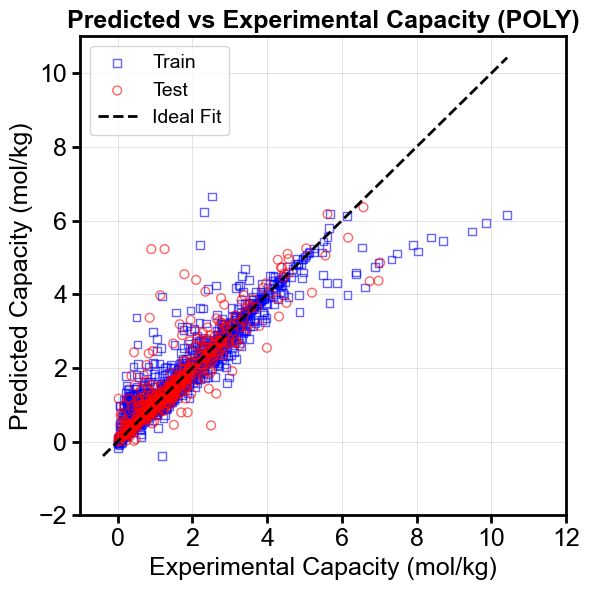

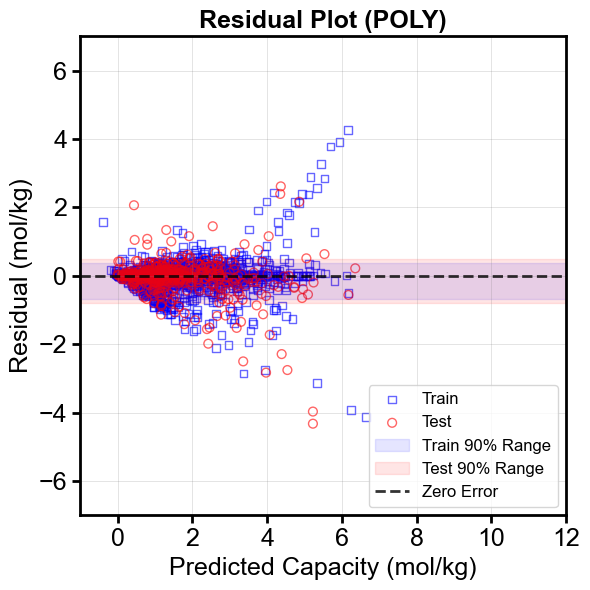

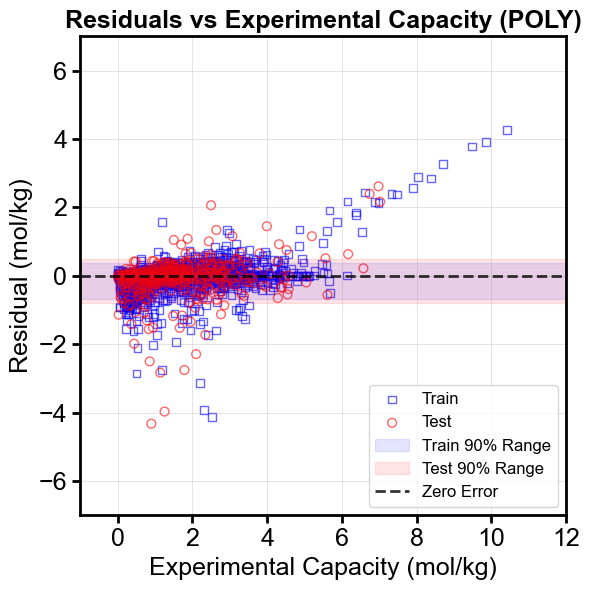

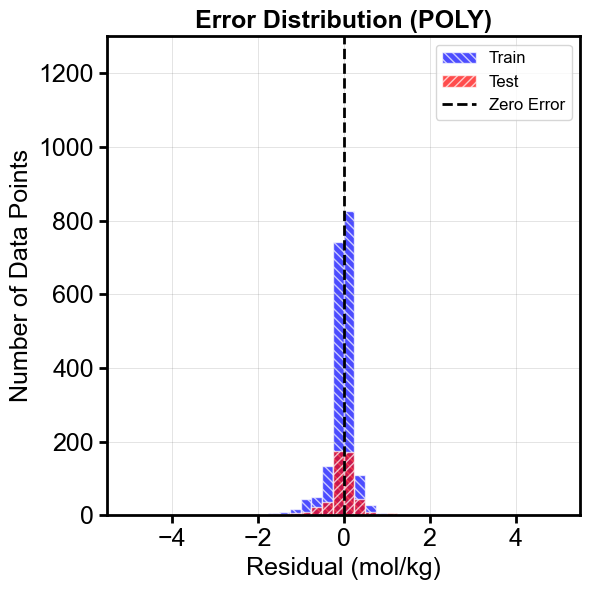

POLY Ê®°ÂûãËØ¶ÁªÜÁªüËÆ°‰ø°ÊÅØ
ÊúÄ‰Ω≥ÂèÇÊï∞: {'svr__C': 604.5915517293635, 'svr__coef0': 0.7495513992401993, 'svr__degree': 3, 'svr__epsilon': 0.008276508883382664}
ËÆ≠ÁªÉÈõÜR¬≤: 0.8726
ÊµãËØïÈõÜR¬≤: 0.7761
ËÆ≠ÁªÉÈõÜMAE: 0.1956 mol/kg
ÊµãËØïÈõÜMAE: 0.2861 mol/kg
ËÆ≠ÁªÉÈõÜRMSE: 0.4318 mol/kg
ÊµãËØïÈõÜRMSE: 0.5557 mol/kg

üìä ÊÆãÂ∑ÆÂàÜÊûê - 90%Êï∞ÊçÆÁÇπËåÉÂõ¥:
ËÆ≠ÁªÉÈõÜ: 90.0% Âú® [-0.6651, 0.3722] mol/kg
ÊµãËØïÈõÜ: 90.0% Âú® [-0.7995, 0.4950] mol/kg

üìä ÊÆãÂ∑ÆÁªüËÆ°:
ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÂùáÂÄº: -0.0317 mol/kg (Ë∂äÊé•Ëøë0Ë∂äÂ•Ω)
ÊµãËØïÈõÜÊÆãÂ∑ÆÂùáÂÄº: -0.0605 mol/kg (Ë∂äÊé•Ëøë0Ë∂äÂ•Ω)
ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: 0.4308 mol/kg (Ë∂äÂ∞èË∂äÂ•Ω)
ÊµãËØïÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: 0.5530 mol/kg (Ë∂äÂ∞èË∂äÂ•Ω)

üìä ËØØÂ∑ÆÂú®[-0.25, 0.25]ËåÉÂõ¥ÂÜÖ:
ËÆ≠ÁªÉÈõÜ: 1568/2000 Êï∞ÊçÆÁÇπ (78.4%)
ÊµãËØïÈõÜ: 347/500 Êï∞ÊçÆÁÇπ (69.4%)

üìä Ê®°ÂûãÊÄßËÉΩËØÑ‰º∞:
‚ùå ÈúÄË¶ÅÊîπËøõ: È¢ÑÊµãËØØÂ∑ÆËæÉÂ§ß
ËøáÊãüÂêàÁ®ãÂ∫¶: 0.1344 mol/kg

ÁîüÊàê SIGMOID Ê†∏ÂáΩÊï∞ÁöÑÂèØËßÜÂåñÂõæË°®


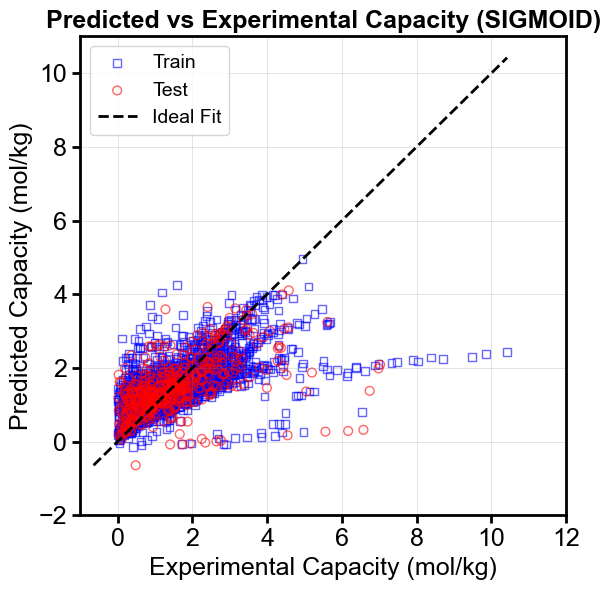

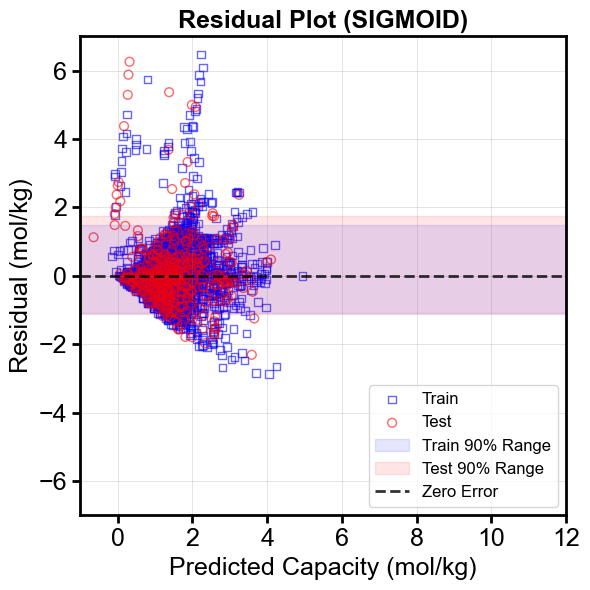

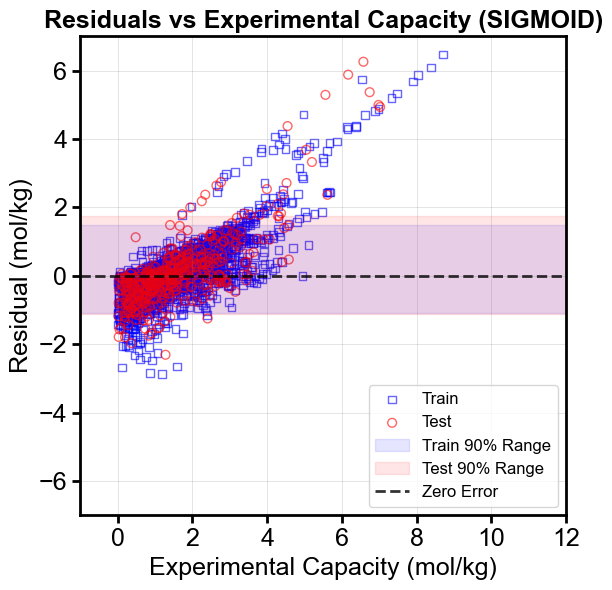

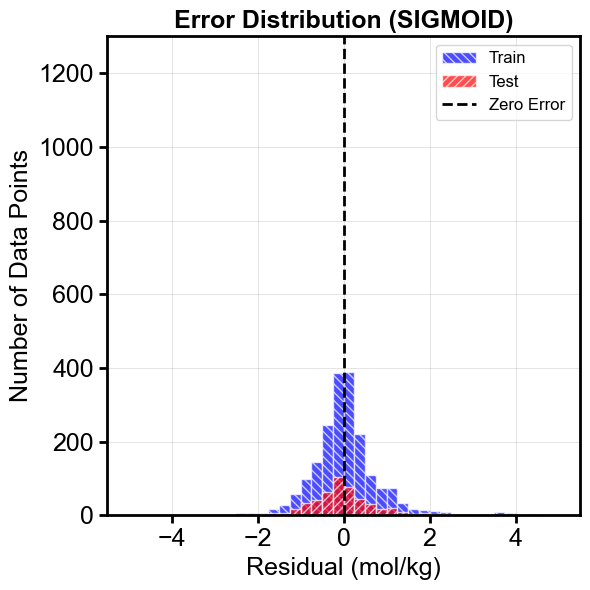

SIGMOID Ê®°ÂûãËØ¶ÁªÜÁªüËÆ°‰ø°ÊÅØ
ÊúÄ‰Ω≥ÂèÇÊï∞: {'svr__C': 265.923975925871, 'svr__coef0': 0.04844189034552504, 'svr__epsilon': 0.0012501565002126212, 'svr__gamma': 4.622351923490326e-05}
ËÆ≠ÁªÉÈõÜR¬≤: 0.3661
ÊµãËØïÈõÜR¬≤: 0.2766
ËÆ≠ÁªÉÈõÜMAE: 0.5818 mol/kg
ÊµãËØïÈõÜMAE: 0.6190 mol/kg
ËÆ≠ÁªÉÈõÜRMSE: 0.9632 mol/kg
ÊµãËØïÈõÜRMSE: 0.9989 mol/kg

üìä ÊÆãÂ∑ÆÂàÜÊûê - 90%Êï∞ÊçÆÁÇπËåÉÂõ¥:
ËÆ≠ÁªÉÈõÜ: 90.0% Âú® [-1.0941, 1.4900] mol/kg
ÊµãËØïÈõÜ: 90.0% Âú® [-1.1092, 1.7545] mol/kg

üìä ÊÆãÂ∑ÆÁªüËÆ°:
ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÂùáÂÄº: 0.0939 mol/kg (Ë∂äÊé•Ëøë0Ë∂äÂ•Ω)
ÊµãËØïÈõÜÊÆãÂ∑ÆÂùáÂÄº: 0.0835 mol/kg (Ë∂äÊé•Ëøë0Ë∂äÂ•Ω)
ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: 0.9588 mol/kg (Ë∂äÂ∞èË∂äÂ•Ω)
ÊµãËØïÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: 0.9964 mol/kg (Ë∂äÂ∞èË∂äÂ•Ω)

üìä ËØØÂ∑ÆÂú®[-0.25, 0.25]ËåÉÂõ¥ÂÜÖ:
ËÆ≠ÁªÉÈõÜ: 776/2000 Êï∞ÊçÆÁÇπ (38.8%)
ÊµãËØïÈõÜ: 181/500 Êï∞ÊçÆÁÇπ (36.2%)

üìä Ê®°ÂûãÊÄßËÉΩËØÑ‰º∞:
‚ùå ÈúÄË¶ÅÊîπËøõ: È¢ÑÊµãËØØÂ∑ÆËæÉÂ§ß
ËøáÊãüÂêàÁ®ãÂ∫¶: 0.2645 mol/kg


In [35]:
# ‰ªéresults‰∏≠ÁöÑÂèÇÊï∞ÈáçÊñ∞ÂàõÂª∫Ê®°Âûã
models = {}

for kernel_name in ['linear', 'rbf', 'poly', 'sigmoid']:
    if kernel_name in results and 'best_params' in results[kernel_name]:
        print(f"ÈáçÊñ∞ÂàõÂª∫ {kernel_name} Ê®°Âûã...")
        
        # ÂàõÂª∫ÁÆ°ÈÅì
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('svr', SVR(kernel=kernel_name))
        ])
        
        # ËÆæÁΩÆÊúÄ‰Ω≥ÂèÇÊï∞
        pipeline.set_params(**results[kernel_name]['best_params'])
        
        # ÈáçÊñ∞ËÆ≠ÁªÉÊ®°Âûã
        pipeline.fit(X_train, y_train)
        
        models[kernel_name] = {
            'model': pipeline,
            'params': results[kernel_name]['best_params']
        }
        
        # ËØÑ‰º∞Ê®°ÂûãÊÄßËÉΩ
        train_score = pipeline.score(X_train, y_train)
        test_score = pipeline.score(X_test, y_test)
        print(f"{kernel_name} - ËÆ≠ÁªÉÈõÜR¬≤: {train_score:.4f}, ÊµãËØïÈõÜR¬≤: {test_score:.4f}")

print("ÊàêÂäüÈáçÊñ∞ÂàõÂª∫ÁöÑÊ®°Âûã:", list(models.keys()))

# Áé∞Âú®ÂèØ‰ª•‰ΩøÁî®modelsÂ≠óÂÖ∏ËøõË°åÂèØËßÜÂåñ
if models:
    # Â≠òÂÇ®ÊâÄÊúâÊ®°ÂûãÁöÑÁªìÊûú
    eval_results = {}
    
    # ‰∏∫ÊØè‰∏™Ê†∏ÂáΩÊï∞ÁîüÊàêÂõæË°®
    for kernel_name, model_info in models.items():
        print(f"\n{'='*80}")
        print(f"ÁîüÊàê {kernel_name.upper()} Ê†∏ÂáΩÊï∞ÁöÑÂèØËßÜÂåñÂõæË°®")
        print(f"{'='*80}")
        
        metrics = plot_model_evaluation(
            kernel_name=kernel_name.upper(),
            model=model_info['model'],
            X_train=X_train,
            y_train=y_train,
            X_test=X_test,
            y_test=y_test,
            best_params=model_info['params']
        )
        
        eval_results[kernel_name] = metrics
else:
    print("Ê≤°ÊúâÊàêÂäüÂàõÂª∫‰ªª‰ΩïÊ®°Âûã")


PREDICTION RESULTS FOR ALL SVR MODELS
‰∏∫ linear ËÆ°ÁÆóÈ¢ÑÊµãÁªìÊûú...

LINEAR È¢ÑÊµãÁªìÊûúÁªüËÆ°:
ËÆ≠ÁªÉÈõÜÊ†∑Êú¨Êï∞: 2000
ÊµãËØïÈõÜÊ†∑Êú¨Êï∞: 500
ËÆ≠ÁªÉÈõÜÂπ≥ÂùáÁªùÂØπËØØÂ∑Æ: 0.5667
ÊµãËØïÈõÜÂπ≥ÂùáÁªùÂØπËØØÂ∑Æ: 0.6169
ËÆ≠ÁªÉÈõÜR¬≤: 0.3888
ÊµãËØïÈõÜR¬≤: 0.2601
‰∏∫ rbf ËÆ°ÁÆóÈ¢ÑÊµãÁªìÊûú...

RBF È¢ÑÊµãÁªìÊûúÁªüËÆ°:
ËÆ≠ÁªÉÈõÜÊ†∑Êú¨Êï∞: 2000
ÊµãËØïÈõÜÊ†∑Êú¨Êï∞: 500
ËÆ≠ÁªÉÈõÜÂπ≥ÂùáÁªùÂØπËØØÂ∑Æ: 0.1268
ÊµãËØïÈõÜÂπ≥ÂùáÁªùÂØπËØØÂ∑Æ: 0.2138
ËÆ≠ÁªÉÈõÜR¬≤: 0.9383
ÊµãËØïÈõÜR¬≤: 0.8440
‰∏∫ poly ËÆ°ÁÆóÈ¢ÑÊµãÁªìÊûú...

POLY È¢ÑÊµãÁªìÊûúÁªüËÆ°:
ËÆ≠ÁªÉÈõÜÊ†∑Êú¨Êï∞: 2000
ÊµãËØïÈõÜÊ†∑Êú¨Êï∞: 500
ËÆ≠ÁªÉÈõÜÂπ≥ÂùáÁªùÂØπËØØÂ∑Æ: 0.1956
ÊµãËØïÈõÜÂπ≥ÂùáÁªùÂØπËØØÂ∑Æ: 0.2861
ËÆ≠ÁªÉÈõÜR¬≤: 0.8726
ÊµãËØïÈõÜR¬≤: 0.7761
‰∏∫ sigmoid ËÆ°ÁÆóÈ¢ÑÊµãÁªìÊûú...

SIGMOID È¢ÑÊµãÁªìÊûúÁªüËÆ°:
ËÆ≠ÁªÉÈõÜÊ†∑Êú¨Êï∞: 2000
ÊµãËØïÈõÜÊ†∑Êú¨Êï∞: 500
ËÆ≠ÁªÉÈõÜÂπ≥ÂùáÁªùÂØπËØØÂ∑Æ: 0.5818
ÊµãËØïÈõÜÂπ≥ÂùáÁªùÂØπËØØÂ∑Æ: 0.6190
ËÆ≠ÁªÉÈõÜR¬≤: 0.3661
ÊµãËØïÈõÜR¬≤: 0.2766

Ââç20Ë°åÈ¢ÑÊµãÁªìÊûú:
    Kernel Dataset  True_y  Predicted_y  Absolute_

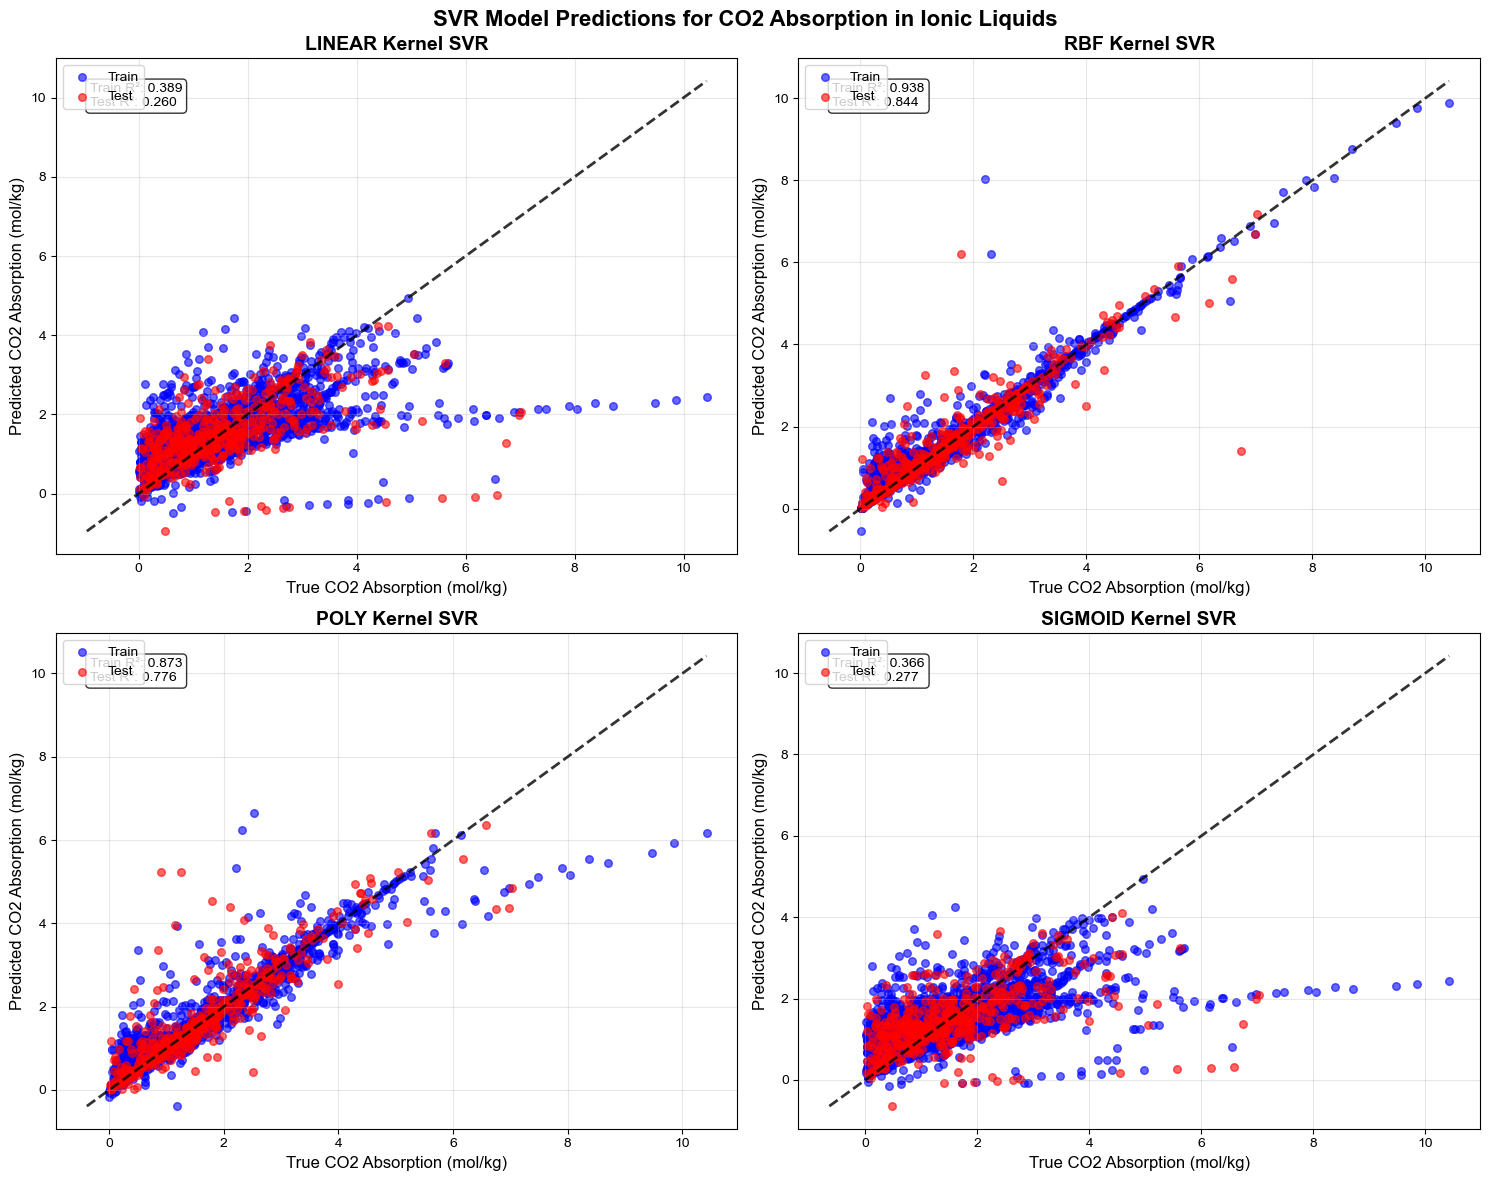


ÊúÄ‰Ω≥Ê®°Âûã: RBF Ê†∏ÂáΩÊï∞
ÊµãËØïÈõÜR¬≤: 0.8440
ÊµãËØïÈõÜRMSE: 0.4639
ÊµãËØïÈõÜAARD%: 32.3137
ÊúÄ‰Ω≥Ê®°ÂûãÂ∑≤‰øùÂ≠ò‰∏∫ 'E:\RNZhang\CO2 capacity\‰øÆÊîπ\SVR‰øÆÊîπ_four kernel - ÂâØÊú¨\best_model_rbf.pkl'


In [36]:
# 6. ËæìÂá∫ÊâÄÊúâÊ®°ÂûãÁöÑÈ¢ÑÊµãÁªìÊûú
print("\n" + "="*80)
print("PREDICTION RESULTS FOR ALL SVR MODELS")
print("="*80)

# ÂàõÂª∫DataFrameÊù•Â≠òÂÇ®ÊâÄÊúâÈ¢ÑÊµãÁªìÊûú
all_predictions = []

for kernel_name, res in results.items():
    # Áõ¥Êé•‰ΩøÁî®ÊúÄ‰Ω≥Ê®°ÂûãÈáçÊñ∞ËÆ°ÁÆóÈ¢ÑÊµãÁªìÊûúÔºåÁ°Æ‰øùÂáÜÁ°ÆÊÄß
    print(f"‰∏∫ {kernel_name} ËÆ°ÁÆóÈ¢ÑÊµãÁªìÊûú...")
    best_model = res['best_model']
    
    # ËÆ°ÁÆóËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÁöÑÈ¢ÑÊµã
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    # ÂàõÂª∫ËÆ≠ÁªÉÈõÜÈ¢ÑÊµãÁªìÊûúDataFrame
    train_df = pd.DataFrame({
        'Kernel': kernel_name,
        'Dataset': 'Train',
        'True_y': y_train,
        'Predicted_y': y_train_pred,
        'Absolute_Error': np.abs(y_train - y_train_pred),
        'Relative_Error_%': np.abs((y_train - y_train_pred) / np.clip(np.abs(y_train), 1e-10, None)) * 100
    })
    
    # ÂàõÂª∫ÊµãËØïÈõÜÈ¢ÑÊµãÁªìÊûúDataFrame
    test_df = pd.DataFrame({
        'Kernel': kernel_name,
        'Dataset': 'Test',
        'True_y': y_test,
        'Predicted_y': y_test_pred,
        'Absolute_Error': np.abs(y_test - y_test_pred),
        'Relative_Error_%': np.abs((y_test - y_test_pred) / np.clip(np.abs(y_test), 1e-10, None)) * 100
    })
    
    # ÂêàÂπ∂ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÁªìÊûú
    kernel_df = pd.concat([train_df, test_df], ignore_index=True)
    all_predictions.append(kernel_df)
    
    # ËæìÂá∫ÊØè‰∏™Ê†∏ÂáΩÊï∞ÁöÑÈ¢ÑÊµãÁªìÊûúÁªüËÆ°
    print(f"\n{kernel_name.upper()} È¢ÑÊµãÁªìÊûúÁªüËÆ°:")
    print(f"ËÆ≠ÁªÉÈõÜÊ†∑Êú¨Êï∞: {len(y_train)}")
    print(f"ÊµãËØïÈõÜÊ†∑Êú¨Êï∞: {len(y_test)}")
    print(f"ËÆ≠ÁªÉÈõÜÂπ≥ÂùáÁªùÂØπËØØÂ∑Æ: {np.mean(np.abs(y_train - y_train_pred)):.4f}")
    print(f"ÊµãËØïÈõÜÂπ≥ÂùáÁªùÂØπËØØÂ∑Æ: {np.mean(np.abs(y_test - y_test_pred)):.4f}")
    print(f"ËÆ≠ÁªÉÈõÜR¬≤: {r2_score(y_train, y_train_pred):.4f}")
    print(f"ÊµãËØïÈõÜR¬≤: {r2_score(y_test, y_test_pred):.4f}")

# ÂêàÂπ∂ÊâÄÊúâÊ†∏ÂáΩÊï∞ÁöÑÈ¢ÑÊµãÁªìÊûú
all_predictions_df = pd.concat(all_predictions, ignore_index=True)

# ËæìÂá∫Ââç20Ë°åÈ¢ÑÊµãÁªìÊûú
print("\nÂâç20Ë°åÈ¢ÑÊµãÁªìÊûú:")
print(all_predictions_df.head(20).round(4))

# ÊåâÊ†∏ÂáΩÊï∞ÂíåÊï∞ÊçÆÈõÜÂàÜÁªÑÁªüËÆ°
print("\nÊåâÊ†∏ÂáΩÊï∞ÂíåÊï∞ÊçÆÈõÜÂàÜÁªÑÁöÑÈ¢ÑÊµãËØØÂ∑ÆÁªüËÆ°:")
grouped_stats = all_predictions_df.groupby(['Kernel', 'Dataset']).agg({
    'Absolute_Error': ['mean', 'std', 'min', 'max'],
    'Relative_Error_%': ['mean', 'std', 'min', 'max']
}).round(4)
print(grouped_stats)



# ‰øùÂ≠òÈ¢ÑÊµãÁªìÊûúÂà∞CSVÊñá‰ª∂
import os
import joblib

# ‰øùÂ≠òÈ¢ÑÊµãÁªìÊûúÂà∞CSVÊñá‰ª∂Ôºà‰øùÂ≠òÂà∞.ipynbÊâÄÂú®ÁõÆÂΩïÔºâ
csv_filename = 'all_model_predictions.csv'
all_predictions_df.to_csv(csv_filename, index=False)

# Ëé∑ÂèñÂÆåÊï¥ÁöÑÁªùÂØπË∑ØÂæÑÂπ∂ÊòæÁ§∫
csv_absolute_path = os.path.abspath(csv_filename)
print(f"\nÊâÄÊúâÈ¢ÑÊµãÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞ '{csv_absolute_path}'")




# 7. ÂèØËßÜÂåñÈ¢ÑÊµãÁªìÊûú
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, kernel_name in enumerate(kernels):
    if kernel_name in results:
        # Ëé∑ÂèñËØ•Ê†∏ÂáΩÊï∞ÁöÑÈ¢ÑÊµãÁªìÊûú
        kernel_data = all_predictions_df[all_predictions_df['Kernel'] == kernel_name]
        
        # ÂàÜÁ¶ªËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ
        train_data = kernel_data[kernel_data['Dataset'] == 'Train']
        test_data = kernel_data[kernel_data['Dataset'] == 'Test']
        
        # ÁªòÂà∂Êï£ÁÇπÂõæ
        axes[i].scatter(train_data['True_y'], train_data['Predicted_y'], 
                       alpha=0.6, label='Train', c='blue', s=30)
        axes[i].scatter(test_data['True_y'], test_data['Predicted_y'], 
                       alpha=0.6, label='Test', c='red', s=30)
        
        # Ê∑ªÂä†ÁêÜÊÉ≥È¢ÑÊµãÁ∫ø
        min_val = min(kernel_data['True_y'].min(), kernel_data['Predicted_y'].min())
        max_val = max(kernel_data['True_y'].max(), kernel_data['Predicted_y'].max())
        axes[i].plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.8, linewidth=2)
        
        axes[i].set_xlabel('True CO2 Absorption (mol/kg)', fontsize=12)
        axes[i].set_ylabel('Predicted CO2 Absorption (mol/kg)', fontsize=12)
        axes[i].set_title(f'{kernel_name.upper()} Kernel SVR', fontsize=14, fontweight='bold')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
        
        # Ê∑ªÂä†R¬≤ÂÄºÂà∞Âõæ‰∏≠
        train_r2 = r2_score(train_data['True_y'], train_data['Predicted_y'])
        test_r2 = r2_score(test_data['True_y'], test_data['Predicted_y'])
        axes[i].text(0.05, 0.95, f'Train R¬≤: {train_r2:.3f}\nTest R¬≤: {test_r2:.3f}', 
                    transform=axes[i].transAxes, fontsize=10, 
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.suptitle('SVR Model Predictions for CO2 Absorption in Ionic Liquids', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('svr_prediction_scatter_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# 8. ËæìÂá∫ÊúÄ‰Ω≥Ê®°ÂûãÔºàÂü∫‰∫éÊµãËØïÈõÜR2Ôºâ
best_kernel = max(results.items(), key=lambda x: x[1]['test_metrics']['R2'])[0]
print(f"\nÊúÄ‰Ω≥Ê®°Âûã: {best_kernel.upper()} Ê†∏ÂáΩÊï∞")
print(f"ÊµãËØïÈõÜR¬≤: {results[best_kernel]['test_metrics']['R2']:.4f}")
print(f"ÊµãËØïÈõÜRMSE: {results[best_kernel]['test_metrics']['RMSE']:.4f}")
print(f"ÊµãËØïÈõÜAARD%: {results[best_kernel]['test_metrics']['AARD%']:.4f}")


# ‰øùÂ≠òÊúÄ‰Ω≥Ê®°ÂûãÔºà‰øùÂ≠òÂà∞.ipynbÊâÄÂú®ÁõÆÂΩïÔºâ
best_model_filename = f'best_model_{best_kernel}.pkl'
joblib.dump(results[best_kernel]['best_model'], best_model_filename)

# Ëé∑ÂèñÂÆåÊï¥ÁöÑÁªùÂØπË∑ØÂæÑÂπ∂ÊòæÁ§∫
model_absolute_path = os.path.abspath(best_model_filename)
print(f"ÊúÄ‰Ω≥Ê®°ÂûãÂ∑≤‰øùÂ≠ò‰∏∫ '{model_absolute_path}'")

In [37]:
# Ëé∑ÂèñËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÁöÑÂéüÂßãÁ¥¢Âºï
train_indices = X_train.index  # ËÆ≠ÁªÉÈõÜÁöÑÂéüÂßãÁ¥¢Âºï
test_indices = X_test.index    # ÊµãËØïÈõÜÁöÑÂéüÂßãÁ¥¢Âºï

# ‰ªéÂéüÂßãÊï∞ÊçÆ‰∏≠Ëé∑ÂèñÂØπÂ∫îÁöÑNo.ÂíåIL
train_no = data.loc[train_indices, 'No.'].values
train_il = data.loc[train_indices, 'IL'].values
test_no = data.loc[test_indices, 'No.'].values
test_il = data.loc[test_indices, 'IL'].values

all_predictions = []

for kernel_name, res in results.items():
    print(f"‰∏∫ {kernel_name} ËÆ°ÁÆóÈ¢ÑÊµãÁªìÊûú...")
    best_model = res['best_model']
    
    # ËÆ°ÁÆóËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÁöÑÈ¢ÑÊµã
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    # ÂàõÂª∫ËÆ≠ÁªÉÈõÜÈ¢ÑÊµãÁªìÊûúDataFrame
    train_df = pd.DataFrame({
        'No.': train_no,
        'IL': train_il,
        'Kernel': kernel_name,
        'Dataset': 'Train',
        'True_y': y_train.values,
        'Predicted_y': y_train_pred,
        'Absolute_Error': np.abs(y_train.values - y_train_pred),
        'Relative_Error_%': np.abs((y_train.values - y_train_pred) / np.clip(np.abs(y_train.values), 1e-10, None)) * 100
    })
    
    # ÂàõÂª∫ÊµãËØïÈõÜÈ¢ÑÊµãÁªìÊûúDataFrame
    test_df = pd.DataFrame({
        'No.': test_no,
        'IL': test_il,
        'Kernel': kernel_name,
        'Dataset': 'Test',
        'True_y': y_test.values,
        'Predicted_y': y_test_pred,
        'Absolute_Error': np.abs(y_test.values - y_test_pred),
        'Relative_Error_%': np.abs((y_test.values - y_test_pred) / np.clip(np.abs(y_test.values), 1e-10, None)) * 100
    })
    
    # ÂêàÂπ∂ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÁªìÊûú
    kernel_df = pd.concat([train_df, test_df], ignore_index=True)
    all_predictions.append(kernel_df)

# ÂêàÂπ∂ÊâÄÊúâÊ†∏ÂáΩÊï∞ÁöÑÈ¢ÑÊµãÁªìÊûú
all_predictions_df = pd.concat(all_predictions, ignore_index=True)

# ÊåâNo.ÊéíÂ∫è
all_predictions_df = all_predictions_df.sort_values(['No.', 'Kernel', 'Dataset']).reset_index(drop=True)

# ‰øùÂ≠òÈ¢ÑÊµãÁªìÊûúÂà∞CSVÊñá‰ª∂
csv_filename = 'all_model_predictions_with_ids.csv'
all_predictions_df.to_csv(csv_filename, index=False)

print(f"\nÊâÄÊúâÈ¢ÑÊµãÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞ '{csv_filename}'")
print(f"Êñá‰ª∂ÂåÖÂê´‰ª•‰∏ãÂàó: {list(all_predictions_df.columns)}")



‰∏∫ linear ËÆ°ÁÆóÈ¢ÑÊµãÁªìÊûú...
‰∏∫ rbf ËÆ°ÁÆóÈ¢ÑÊµãÁªìÊûú...
‰∏∫ poly ËÆ°ÁÆóÈ¢ÑÊµãÁªìÊûú...
‰∏∫ sigmoid ËÆ°ÁÆóÈ¢ÑÊµãÁªìÊûú...

ÊâÄÊúâÈ¢ÑÊµãÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞ 'all_model_predictions_with_ids.csv'
Êñá‰ª∂ÂåÖÂê´‰ª•‰∏ãÂàó: ['No.', 'IL', 'Kernel', 'Dataset', 'True_y', 'Predicted_y', 'Absolute_Error', 'Relative_Error_%']


In [ ]:
#### ‰ª£Á†ÅÂÆå